# Hematopoiesis data visualization

#### load libraries

In [2]:
from __future__ import division
from scipy import stats
from collections import OrderedDict
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter,MaxNLocator
from matplotlib import rc
import scipy.io as sio
import h5py
import math
#import webcolors
import os
import random
import matplotlib.style

#### load some functions:

In [3]:
path = os.getcwd()
os.chdir(path)
%run "defined_functions.ipynb"

In [4]:
path

'D:\\Documents\\MATLAB\\HematopoieticDisorderAnalysis\\Python\\data_analysis'

#### specify if graphics should be saved:

In [5]:
opt_save = True

#### specify settings for plt graphics

In [6]:
loadPltSettings(25,20) #fontSize,markerSize

<module 'matplotlib.pyplot' from 'C:\\Users\\PowerWS\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

#### define colors

In [7]:
sns.set(style="whitegrid")
col_H = '#194795'
col_H_light = '#0F2F66'
col_H_y = '#57B8F9'
col_H_y_light = '#279DEC'
col_H_a = '#194795'
col_H_a_light = '#0F2F66'
col_MDS = '#C61D1D'
col_MDS_light = '#791010'
col_MDS_m1 = '#FD8002'
col_MDS_m2 = '#AD07E3'
col_MDS_m3 = '#FF0000'
col_MDS_m4 = '#FF3399'
col_MDS_m5 = '#813434'
col_MDS_m6 = '#FF0010'
col_MDS_m7 = '#813437'
col_MDS_m8 = '#834537'
col_CHIP = '#009999'
col_CHIP_light = '#00FFFF'

cols_H_vs_MDS = sns.color_palette([col_H,col_MDS])
cols_H_vs_MDS_light = sns.color_palette([col_H_light,col_MDS_light])
cols_H_vs_MDS_mut = sns.color_palette([col_H,col_MDS,col_MDS_m1,col_MDS_m2,col_MDS_m3,col_MDS_m4,col_MDS_m5,col_MDS_m6,col_MDS_m7,col_MDS_m8])

cols_H_y_vs_MDS = sns.color_palette([col_H_y,col_MDS])
cols_H_y_vs_MDS_light = sns.color_palette([col_H_y_light,col_MDS_light])

cols_H_y_vs_H_a = sns.color_palette([col_H_y, col_H_a])
cols_H_y_vs_H_a_light = sns.color_palette([col_H_y_light, col_H_a_light])

cols_H_y_vs_H_a_vs_MDS = sns.color_palette([col_H_y, col_H_a, col_MDS])
cols_H_y_vs_H_a_vs_MDS_light = sns.color_palette([col_H_y_light, col_H_a_light, col_MDS_light])

cols_CHIP_vs_MDS = sns.color_palette([col_CHIP,col_MDS])
cols_CHIP_vs_MDS_light = sns.color_palette([col_CHIP_light,col_MDS_light])

cols_H_vs_CHIP = sns.color_palette([col_H,col_CHIP])
cols_H_vs_CHIP_light = sns.color_palette([col_H_light,col_CHIP_light])

cols_H_vs_CHIP_vs_MDS = sns.color_palette([col_H,col_CHIP,col_MDS])
cols_H_vs_CHIP_vs_MDS_light = sns.color_palette([col_H_light,col_CHIP_light,col_MDS_light])

cols_status_3 = sns.color_palette([col_H_y_light,col_H_a_light,col_MDS_light])
cols_status_light_3 = sns.color_palette([col_H_y,col_H_a,col_MDS])

cols_BMtype_3 = sns.color_palette(['#009999','#99004C','#CC6600'])
cols_BMtype_light_3 = sns.color_palette(['#00FFFF','#FF007F','#FF9933'])

cols_CT = sns.color_palette(['#CC0000','#FF8000','#003366','#6600CC','#00994C','#57D7F7','#FFE00E','#A0A0A0']);
#division plots
cols_divisions = sns.color_palette(["navy","teal","lightseagreen","yellowgreen","gold","orange","tomato","darkred","purple","orchid","dimgrey","darkgrey"])

#### define marker symbols

In [8]:
marker_MDS = 'o'
marker_H_y = 's'
marker_H_a = '^'
marker_CHIP = 's'

#### define groups, Cell types of interest, mutation of interest, samples excluded

In [9]:
Groups=['healthy','CHIP','MDS','healthy age-matched','healthy young','healthy aged']
CT_str=['HSC','MPP','MLP','CMP','GMP','MEP','mature','all cells']
mutations_of_interest_str = ''
opt_mutations_of_interest = 'combined'
#opt_mutations_of_interest = 'stemCellLevel'
samples_excluded_MDS = ["110","433","173","215","460","592","545"]
samples_excluded_H = ["450","425","729","754"]

#### load data

In [10]:
df_FACS, df_PD, df, df_divs_F_all, df_divs_all,mutation_str = load_data_frames(CT_str, samples_excluded_H, samples_excluded_MDS, Groups, opt_mutations_of_interest, mutations_of_interest_str)

(132, 342)
(50, 342)
(62, 342)
(81, 342)
(51, 342)
(81, 342)


In [61]:
#df_FACS.head()
#df_PD.head()
#df.head()
#df_divs_F_all.head() 
#df_divs_all['Group'].unique()

In [62]:
#df[['Sample_ID','Mutation_counts']].get_values()

In [63]:
#df[df['Sample_ID']=='H561'][['Sample_ID','TP53_VAF']]

In [64]:
#np.any(df[mutation_str+'_VAF'].get_values().astype(np.float)>0,axis=1)

### Pie charts of individual samples

In [65]:
#df[df['sample_name']=='552_1']

In [99]:
path = os.getcwd()
os.chdir(path)
%run "defined_functions.ipynb"

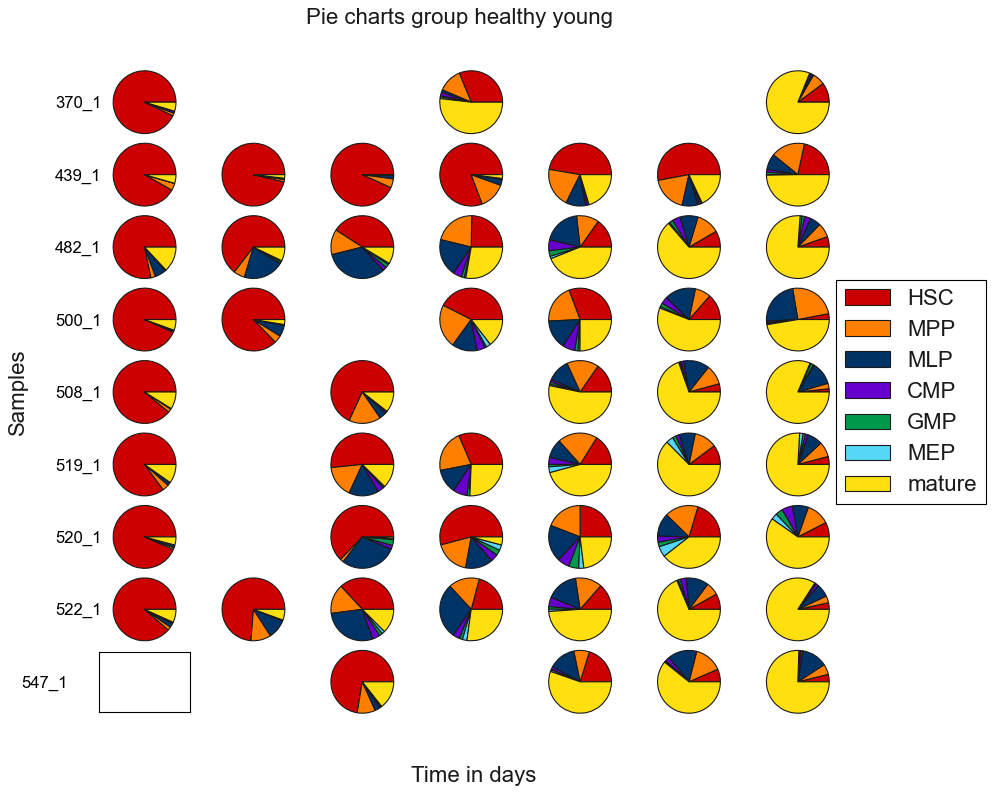

In [100]:
plot_pie_charts_of_single_samples(df,'healthy young',CT_str[:-1],cols_CT,mutation_str,opt_save)

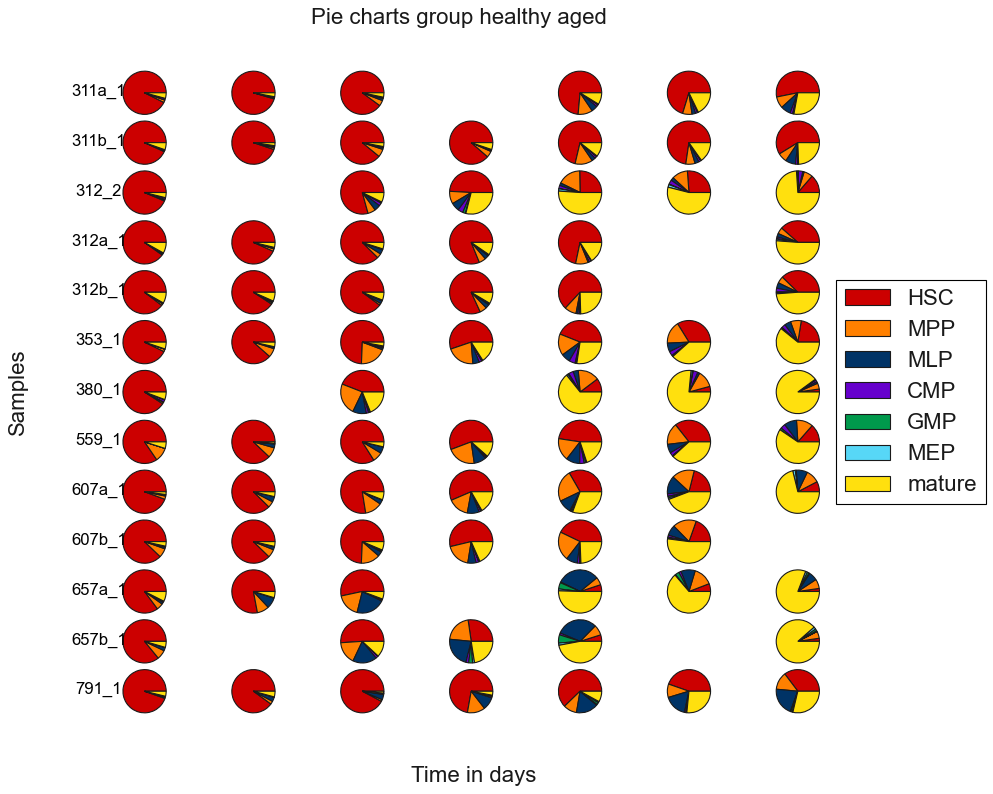

In [101]:
plot_pie_charts_of_single_samples(df,'healthy aged',CT_str[:-1],cols_CT,mutation_str,opt_save)

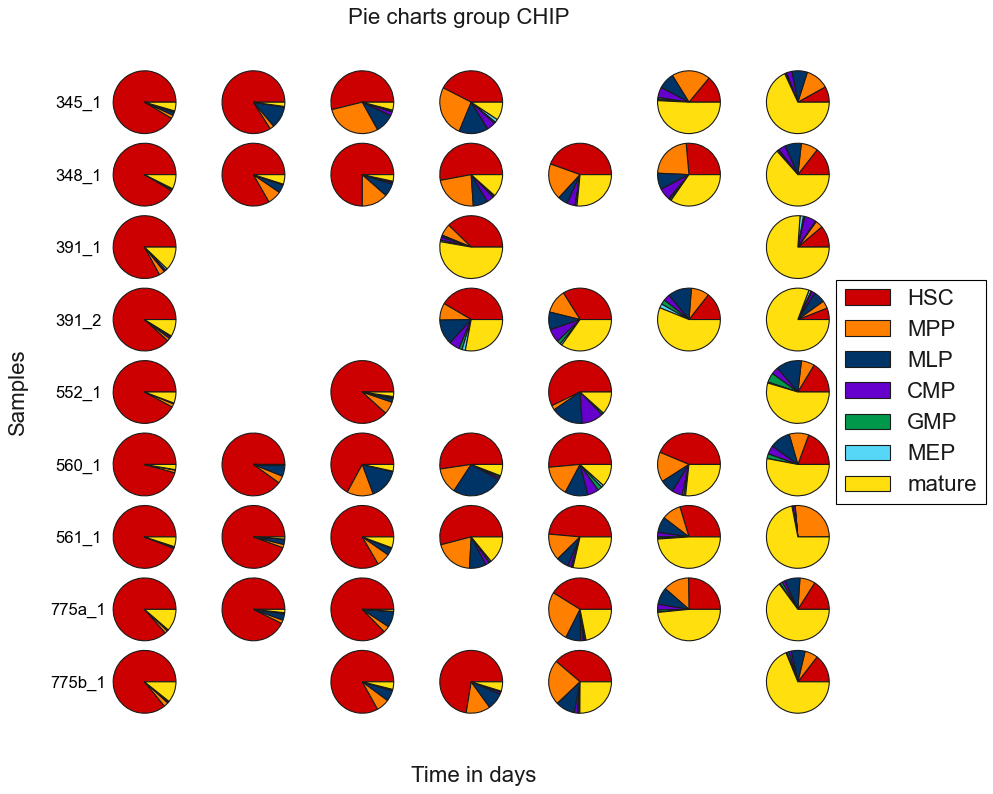

In [102]:
plot_pie_charts_of_single_samples(df,'CHIP',CT_str[:-1],cols_CT,mutation_str,opt_save)

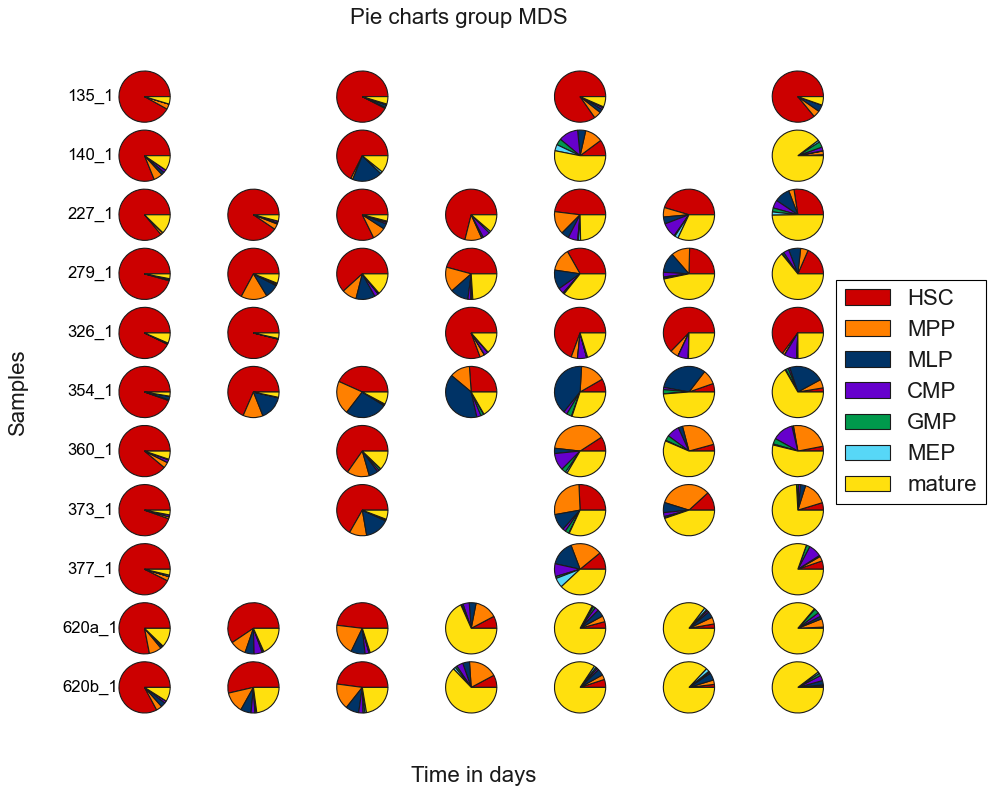

In [103]:
plot_pie_charts_of_single_samples(df,'MDS',CT_str[:-1],cols_CT,mutation_str,opt_save)

### Age distribution of individuals

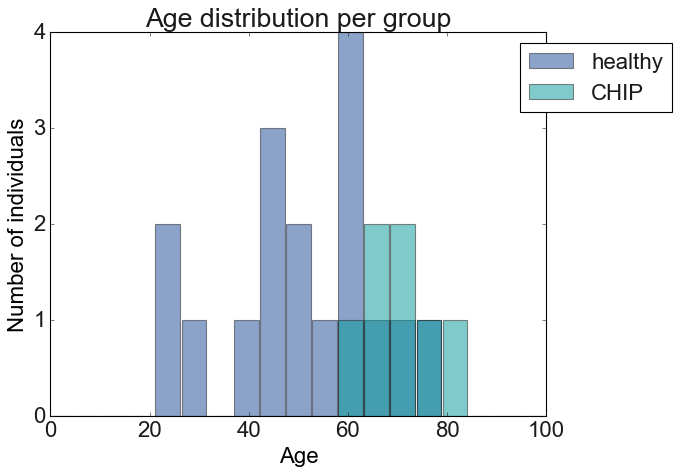

In [104]:
loadPltSettings(20,20) #fontSize,markerSize
plot_age_distributions(df,['healthy','CHIP'],cols_H_vs_CHIP,opt_save)

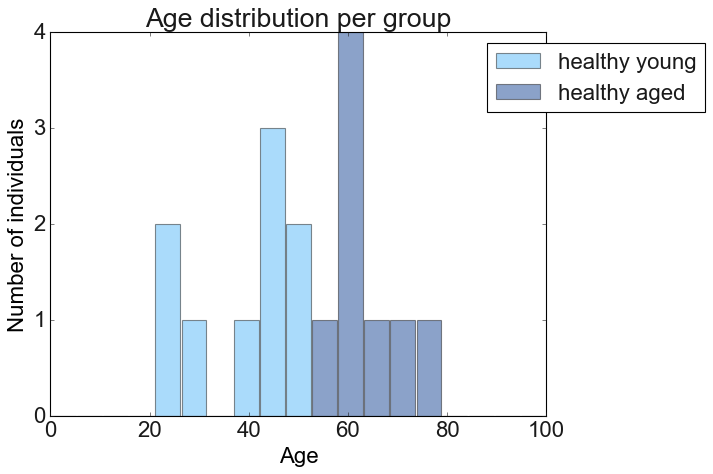

In [105]:
plot_age_distributions(df,['healthy young','healthy aged'],cols_H_y_vs_H_a,opt_save)

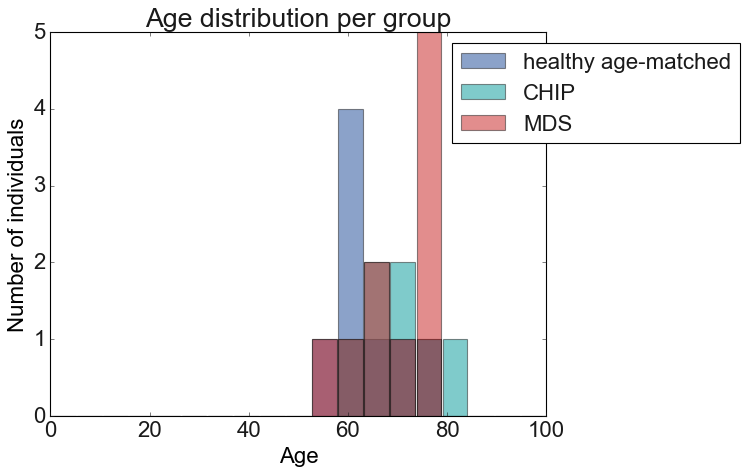

In [106]:
plot_age_distributions(df,['healthy age-matched','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,opt_save)

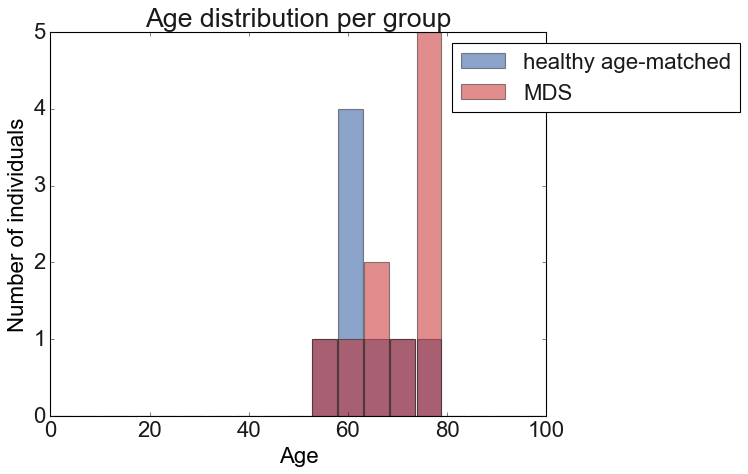

In [107]:
plot_age_distributions(df,['healthy age-matched','MDS'],cols_H_vs_MDS,opt_save)

### Plot samples
#### a) plot samples grouped by Status_detailed (with color code):

1. Specify transformation of data

In [108]:
transf = 'log10'

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The

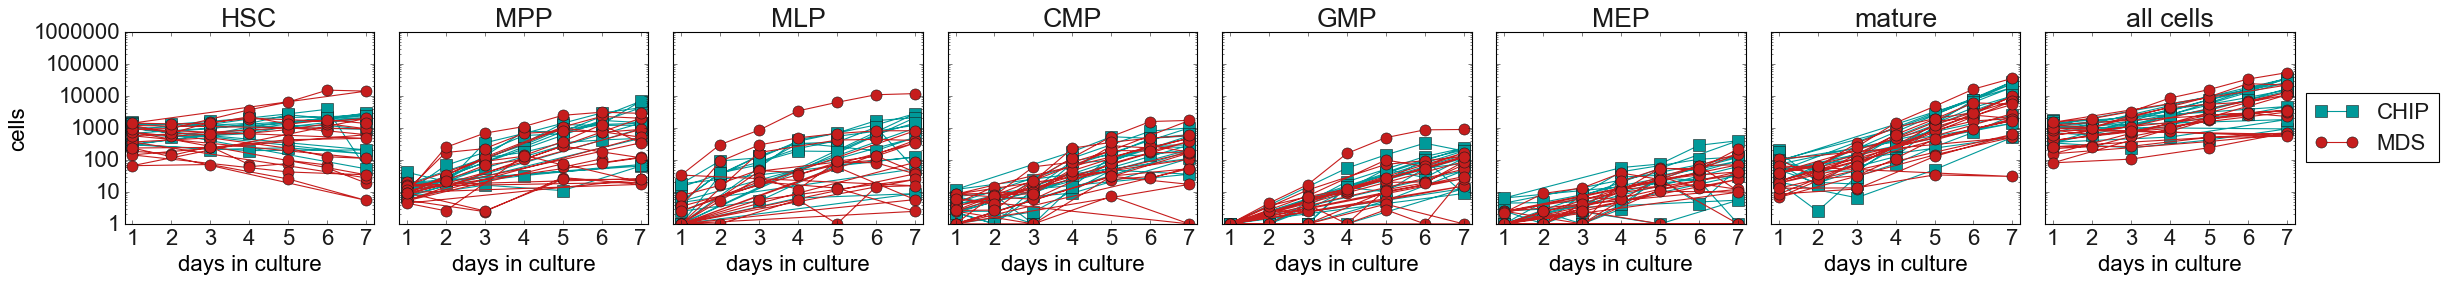

In [109]:
loadPltSettings(20,10) #fontSize,markerSize
plot_all_samples(df,CT_str,transf,['CHIP','MDS'],cols_CHIP_vs_MDS,[marker_CHIP,marker_MDS],False,opt_save)

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The

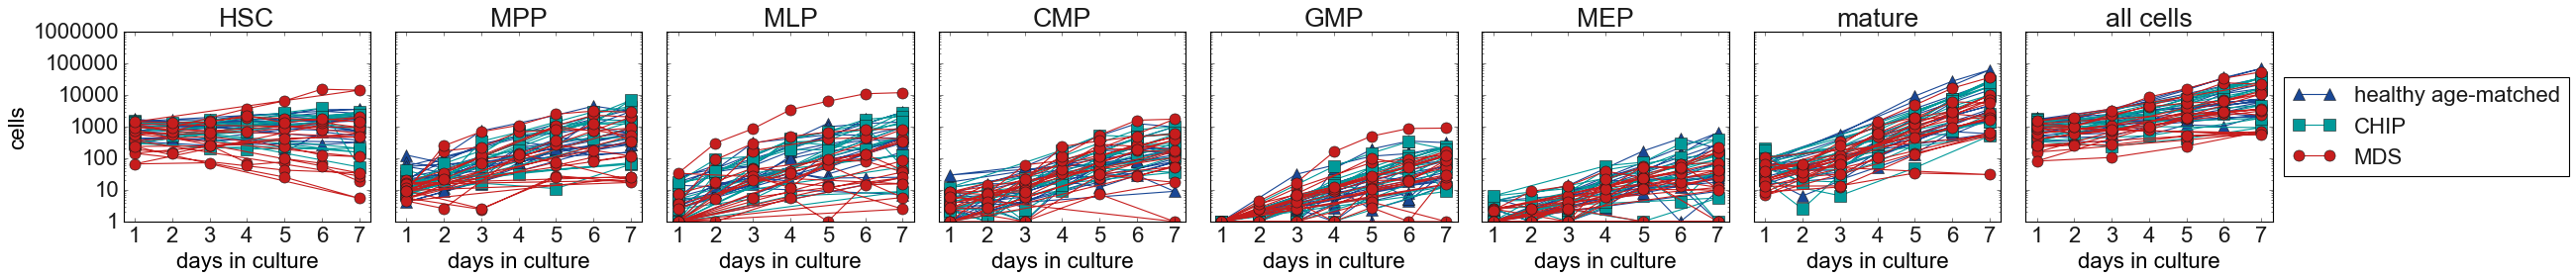

In [110]:
loadPltSettings(20,10) #fontSize,markerSize
plot_all_samples(df,CT_str,transf,['healthy age-matched','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],False,opt_save)

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The

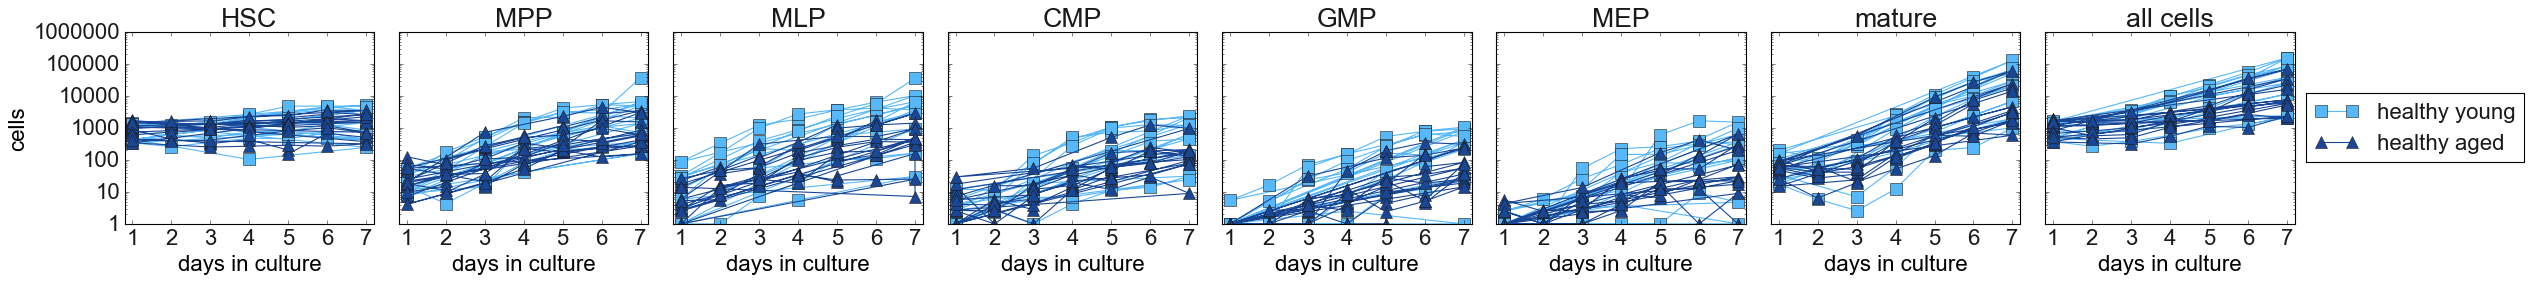

In [111]:
loadPltSettings(20,10) #fontSize,markerSize
plot_all_samples(df,CT_str,transf,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],False,opt_save)

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name 

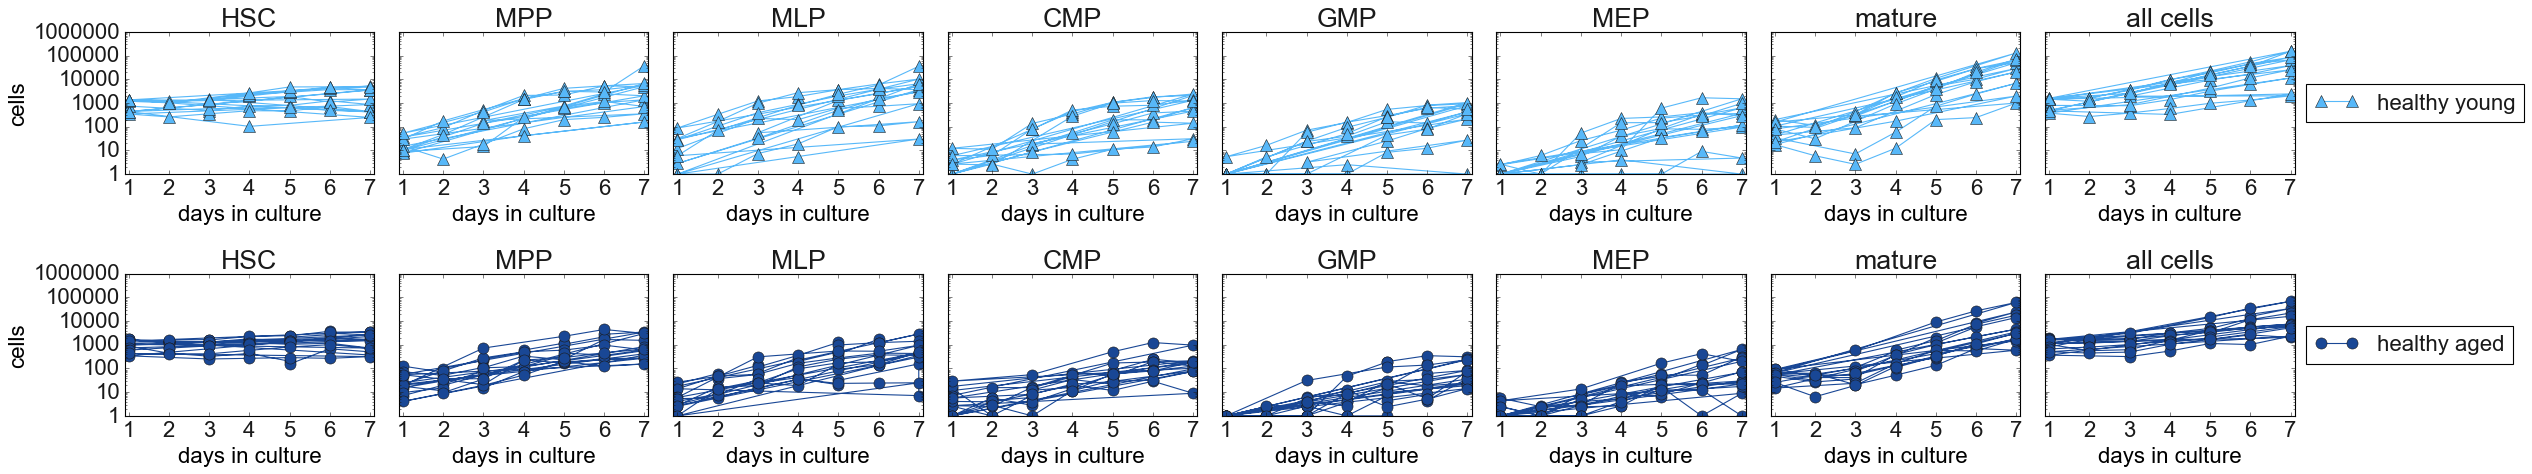

In [112]:
plot_all_samples(df,CT_str,transf,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_a,marker_MDS],True,opt_save)

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The

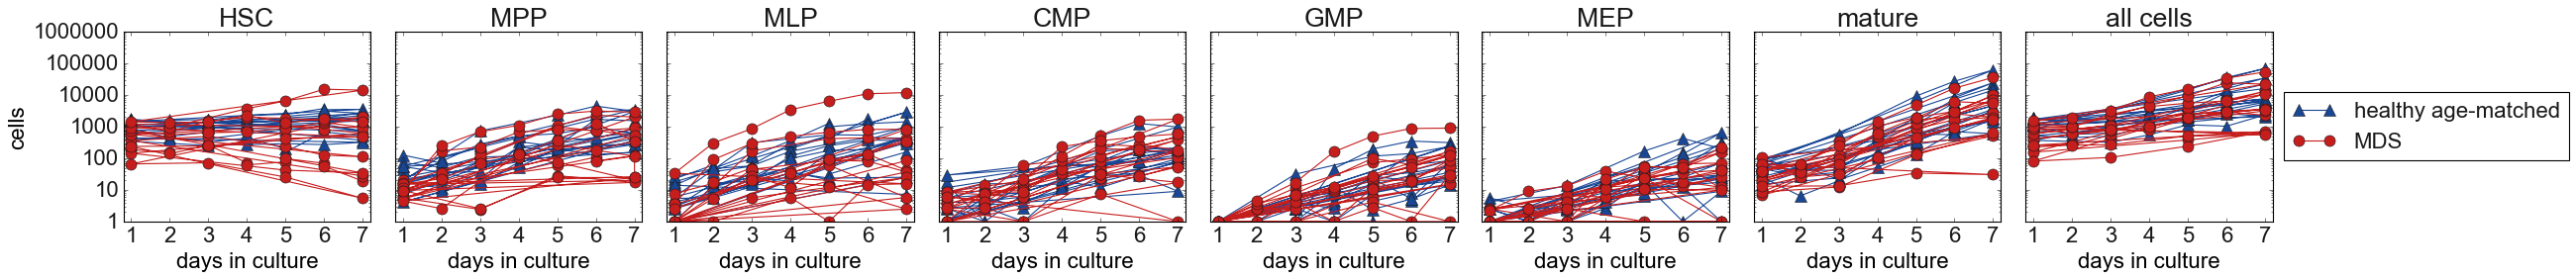

In [113]:
plot_all_samples(df,CT_str,transf,['healthy age-matched','MDS'],cols_H_vs_MDS,[marker_H_a,marker_MDS],False,opt_save)

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name 

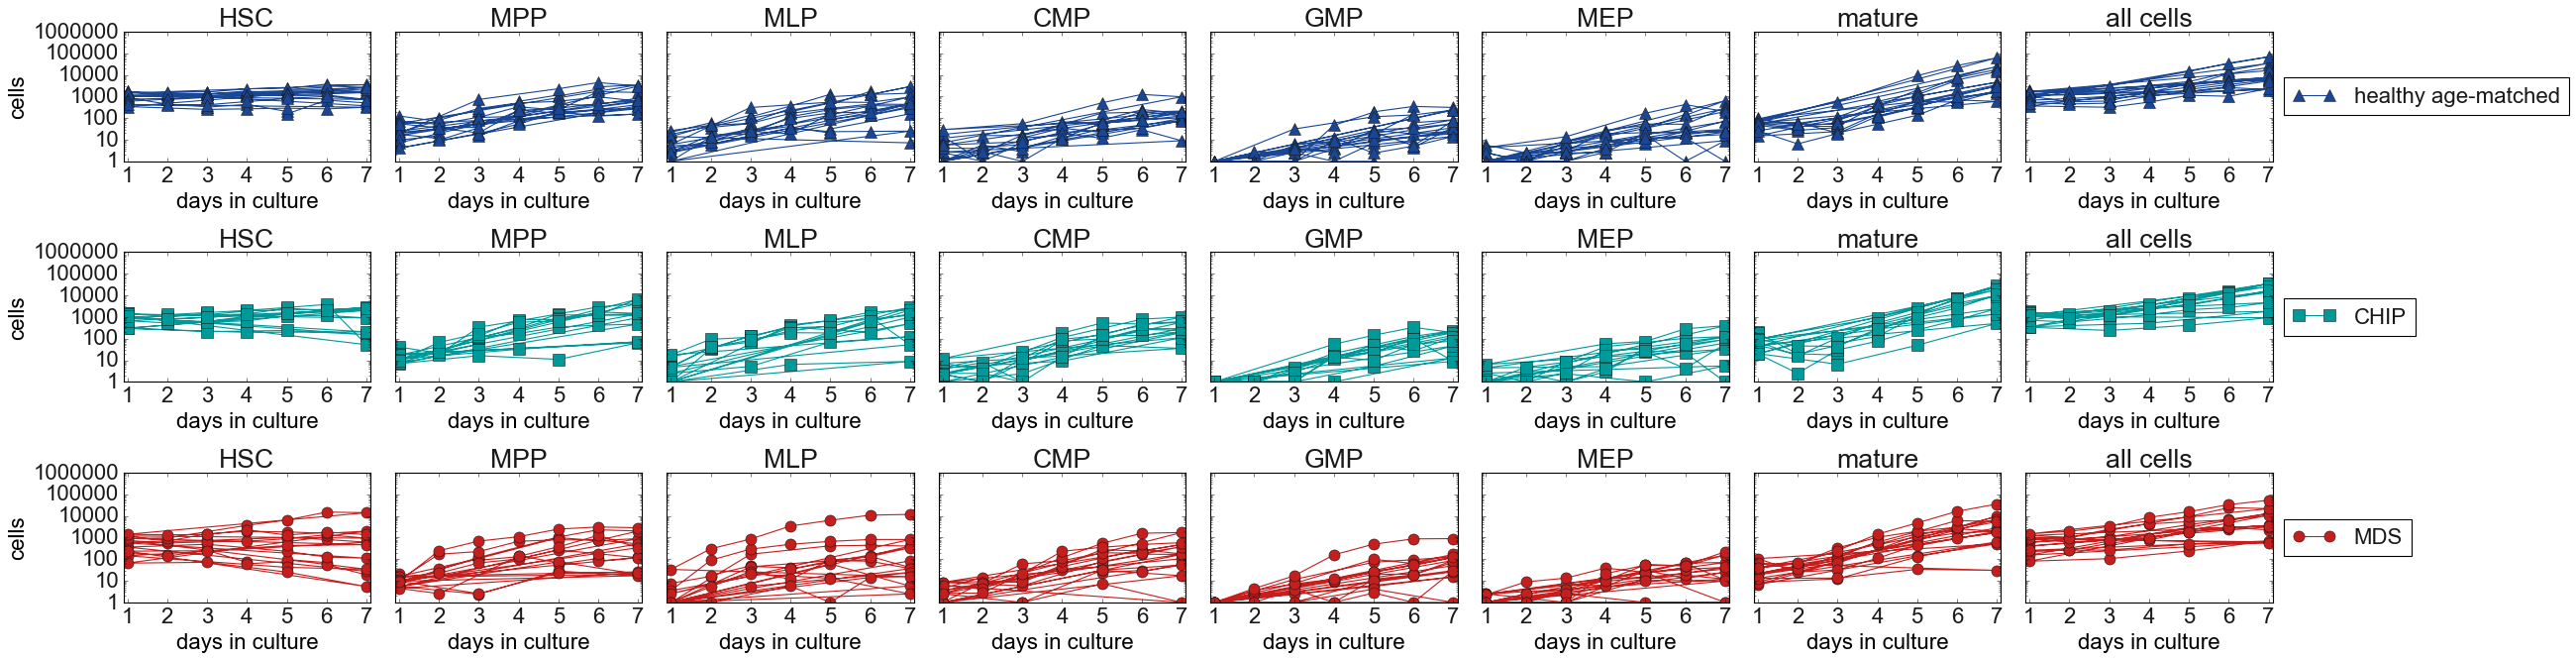

In [114]:
plot_all_samples(df,CT_str,transf,['healthy age-matched','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],True,opt_save)

#### b) Plot single samples

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name 

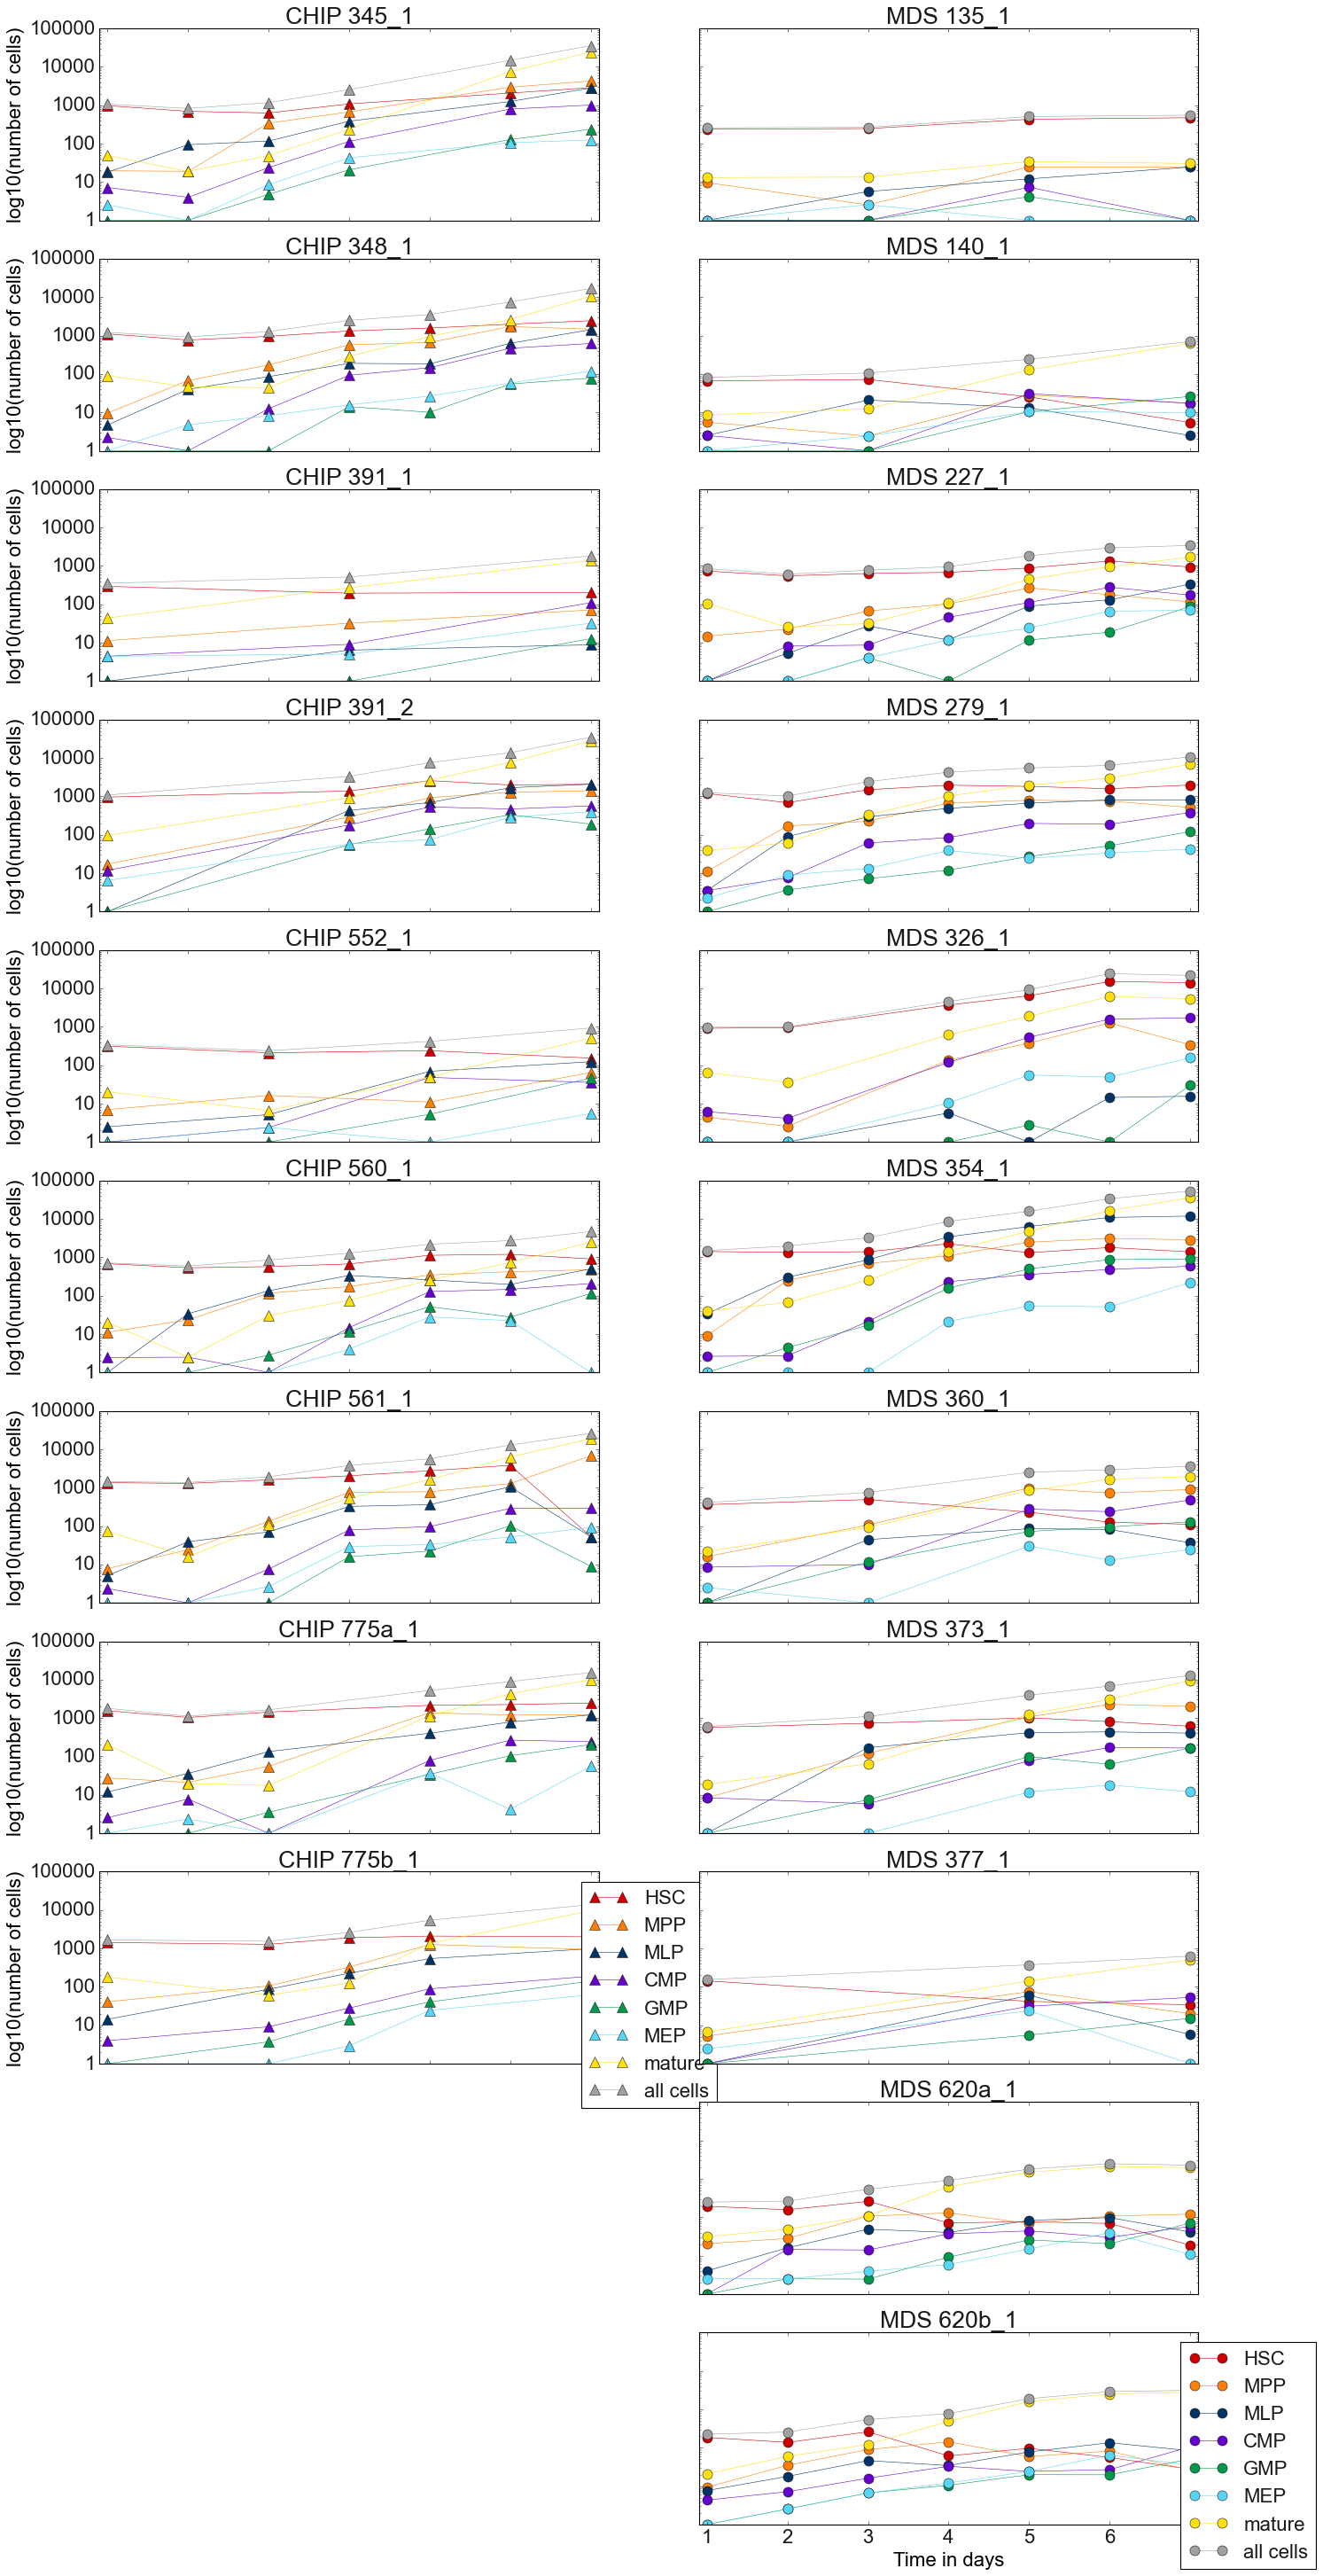

In [115]:
plot_single_samples_of2groups(df,['CHIP','MDS'],transf,CT_str,cols_CT,[marker_H_a,marker_MDS],opt_save)

C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name 

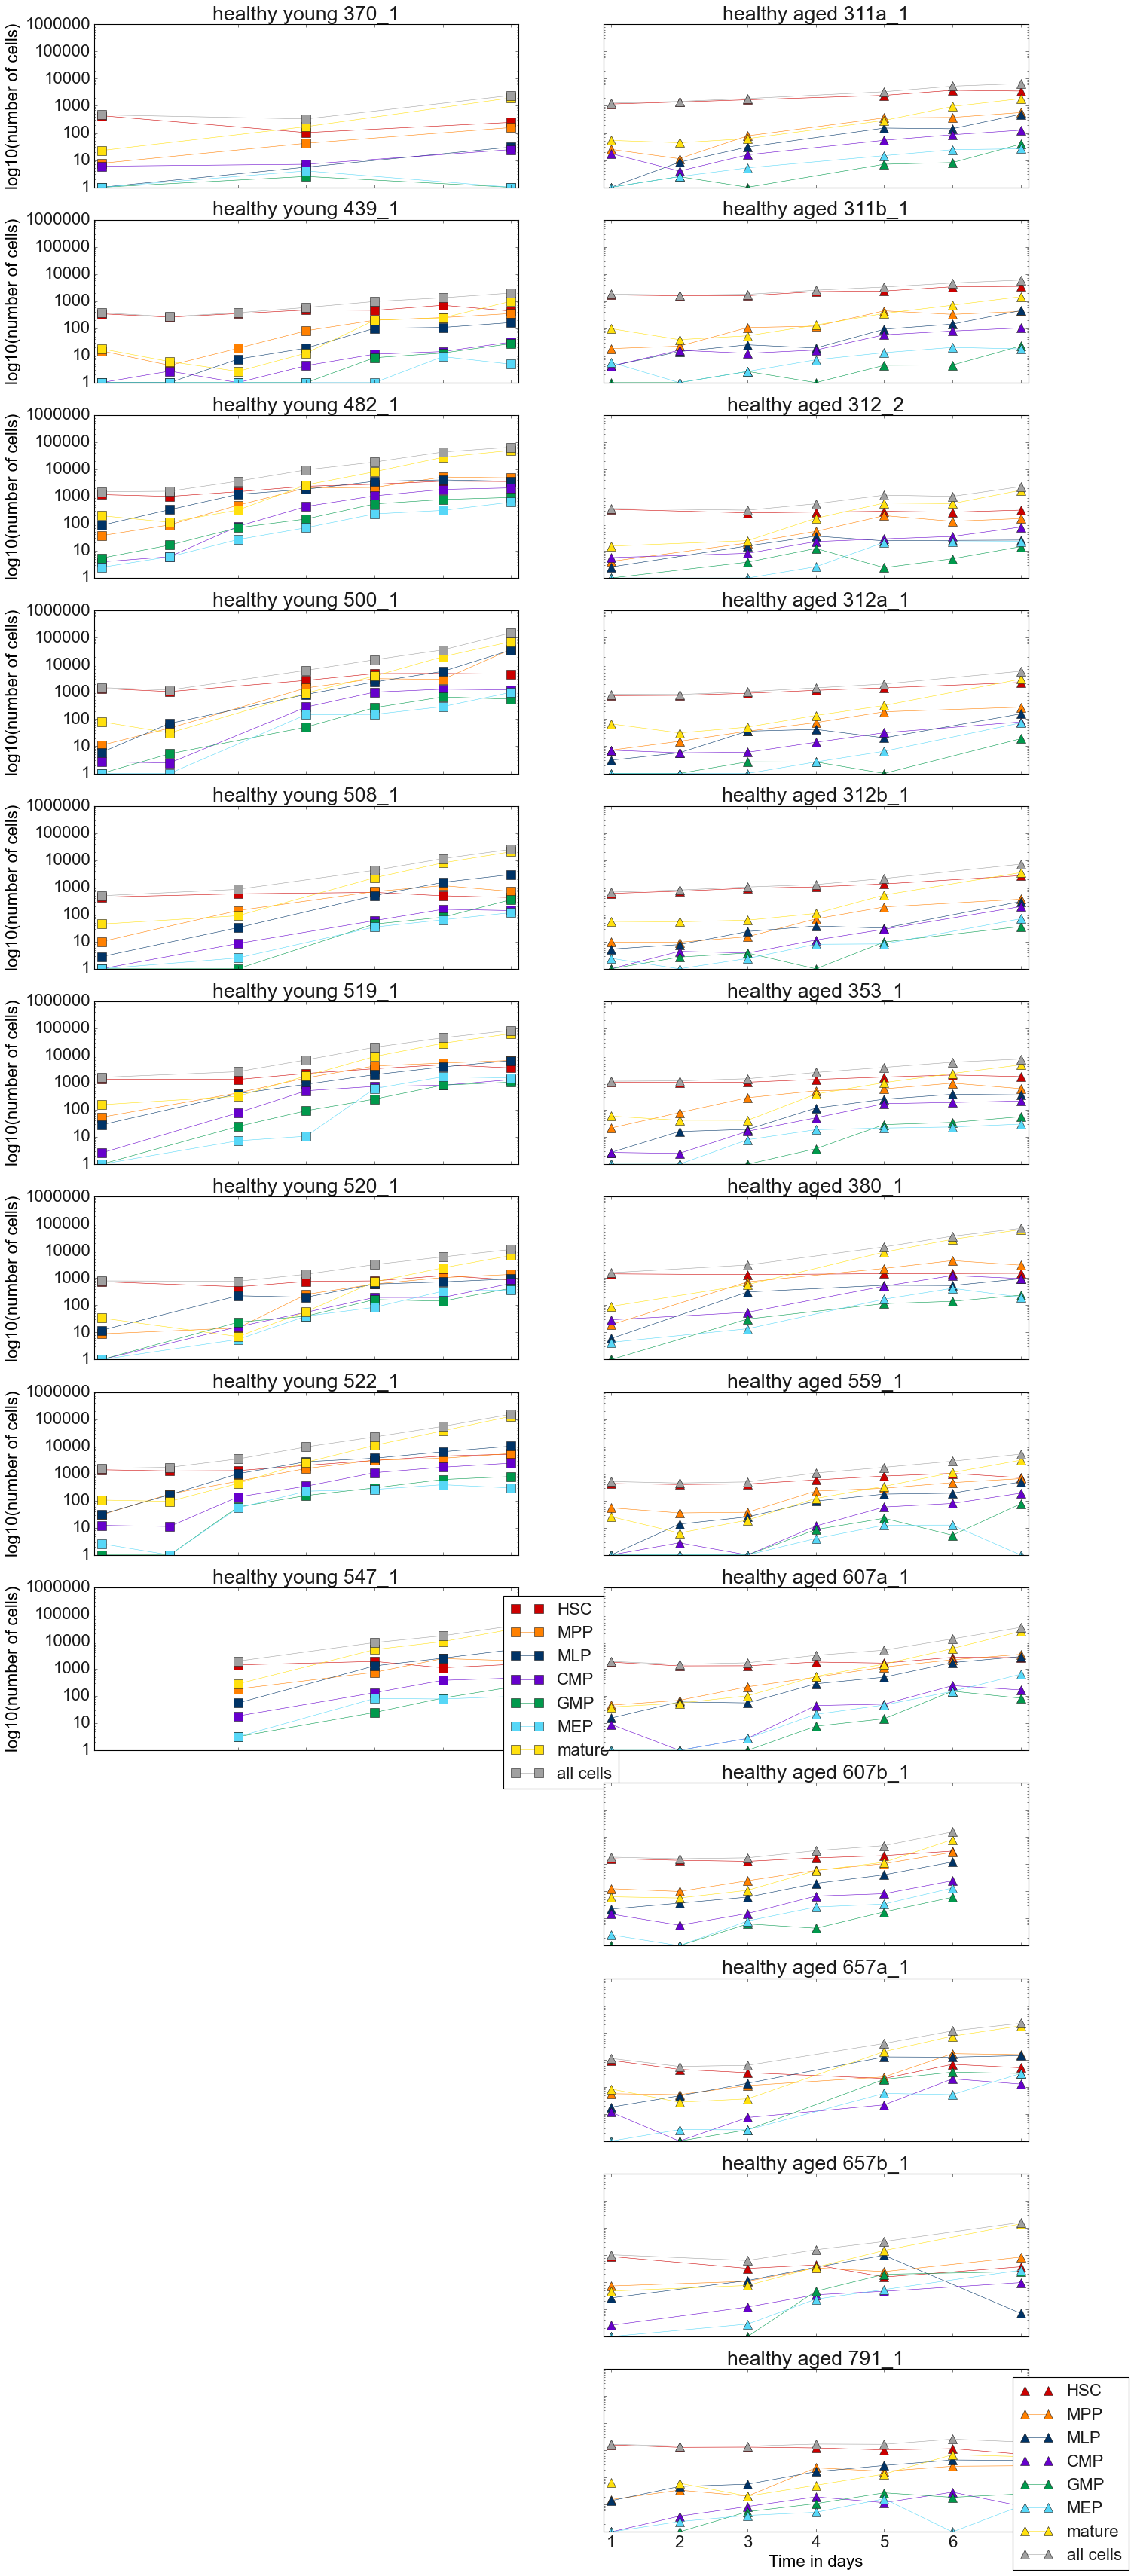

In [116]:
plot_single_samples_of2groups(df,['healthy young','healthy aged'],transf,CT_str,cols_CT,[marker_H_y,marker_H_a],opt_save)

In [117]:
#plot_single_samples_of2groups(df,['H_age_matched','MDS'],transf,['HSC'],cols_CT)

### Plot relative count of BM cells at day 7 per cell type

In [207]:
CT_str_red=['HSC','MPP','MLP','CMP','GMP','MEP']
FS=[35,25,20]
#opt_test = 'Kruskal_Wallis'
opt_test = 'Kolmogorov_Smirnov'
#opt_test = ''

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


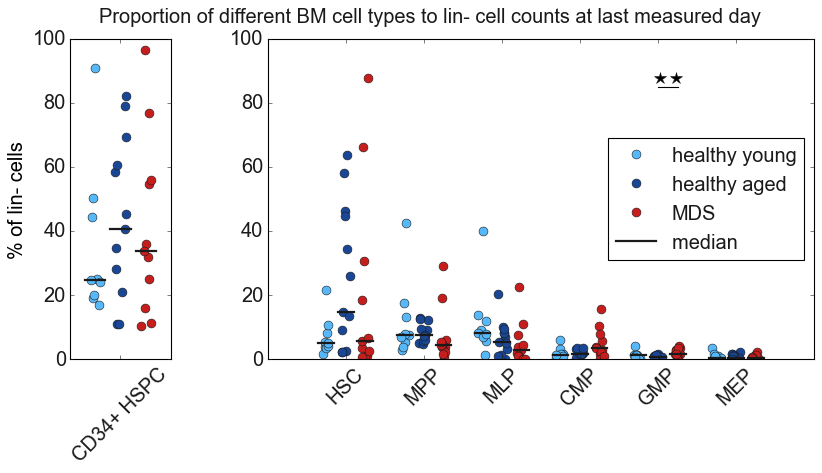

In [208]:
#normalisierung komisch --> lin neg correction
G=['healthy young', 'healthy aged', 'MDS']
add_file_str = '_H_y_vs_H_a_vs_MDS'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_y_vs_H_a_vs_MDS,cols_H_y_vs_H_a_vs_MDS_light,CT_str_red,G,add_file_str,mutation_str,opt_test,opt_save)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


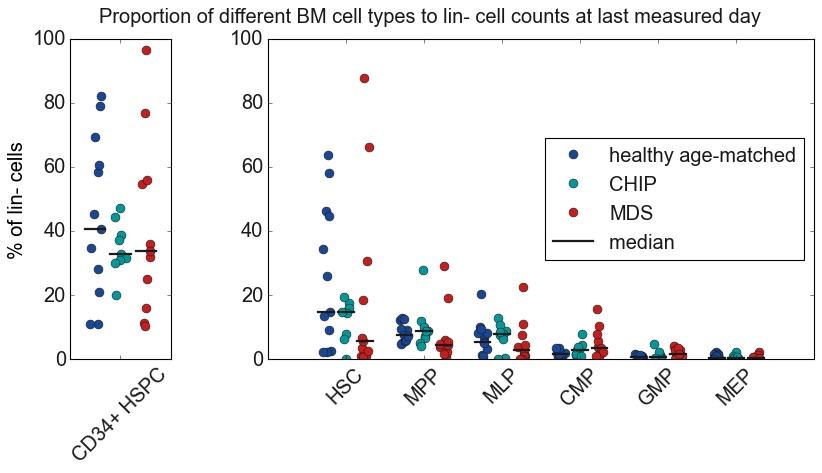

In [209]:
G=['healthy age-matched','CHIP','MDS']
add_file_str = '_H_age_matched_vs_CHIP_vs_MDS'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_vs_CHIP_vs_MDS,cols_H_vs_CHIP_vs_MDS_light,CT_str_red,G,add_file_str,mutation_str,opt_test,opt_save)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


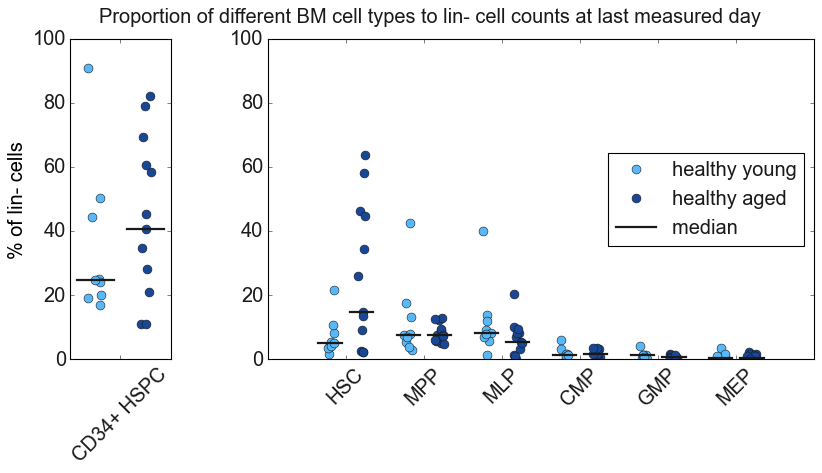

In [210]:
G=['healthy young', 'healthy aged']
add_file_str = '_H_y_vs_H_a'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_y_vs_H_a,cols_H_y_vs_H_a_light,CT_str_red,G,add_file_str,mutation_str,opt_test,opt_save)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


6
0.04135257815244734


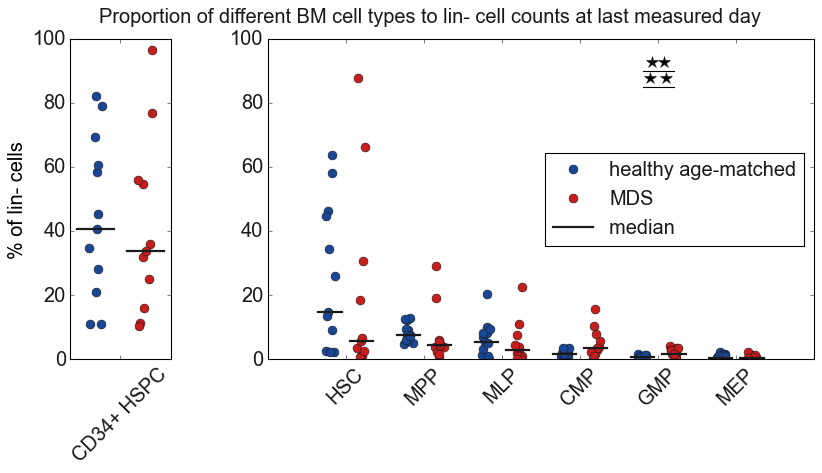

In [211]:
G=['healthy age-matched','MDS']
add_file_str = '_H_age_matched_vs_MDS'
F = plot_fraction_Of_BM_cells_day7(df,cols_H_vs_MDS,cols_H_vs_MDS_light,CT_str_red,G,add_file_str,mutation_str,opt_test,opt_save)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


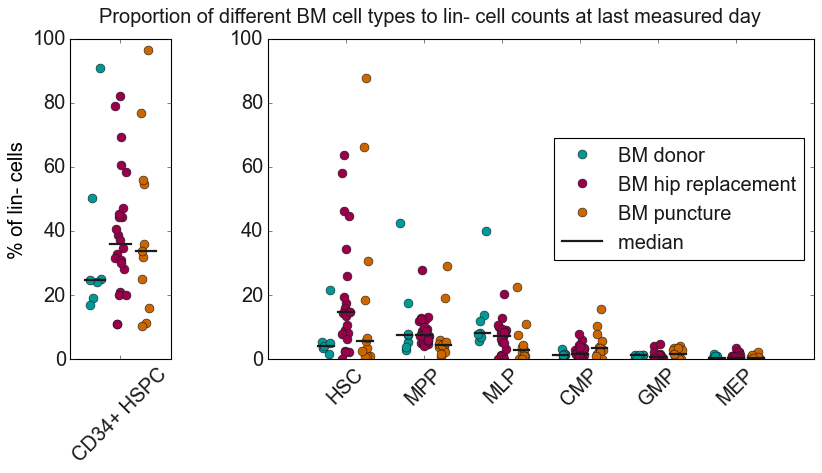

In [212]:
G=['BM donor', 'BM hip replacement', 'BM puncture']
add_file_str = '_BM_type'
F = plot_fraction_Of_BM_cells_day7(df,cols_BMtype_3,cols_BMtype_light_3,CT_str_red,G,add_file_str,mutation_str,opt_test,opt_save)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


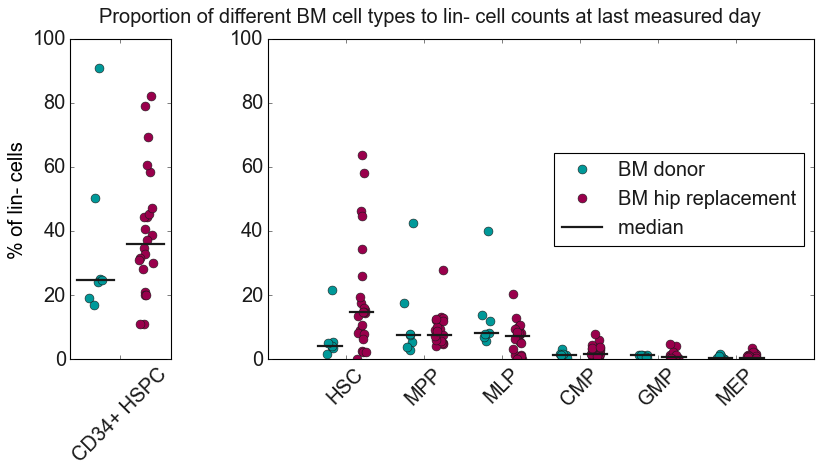

In [213]:
G=['BM donor', 'BM hip replacement']
add_file_str = '_BM_type_healthy'
F = plot_fraction_Of_BM_cells_day7(df,cols_BMtype_3,cols_BMtype_light_3,CT_str_red,G,add_file_str,mutation_str,opt_test,opt_save)

### Plot yield after 7 days
number of mature cells or progenitors day 7 per HSCs day 1 

In [84]:
loadPltSettings(30,10)
path = os.getcwd()
os.chdir(path)
%run "defined_functions.ipynb"

['500']
[]
Kolmogorov Smirnov test HSC: 
p-value group 1 vs. 2: 0.33237350884409705
HSPC Kruskal Wallis p-val:
0.026885511853408057
Mann Whitney U-test HSPC: 
p-value group 1 vs. 2: 0.01519141098828875
Kolmogorov Smirnov test HSPC: 
p-value group 1 vs. 2: 0.0021390374331550803
Mann Whitney U-test mature: 
p-value group 1 vs. 2: 0.030300984856003035
Kolmogorov Smirnov test mature: 
p-value group 1 vs. 2: 0.054709995886466474


C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  I

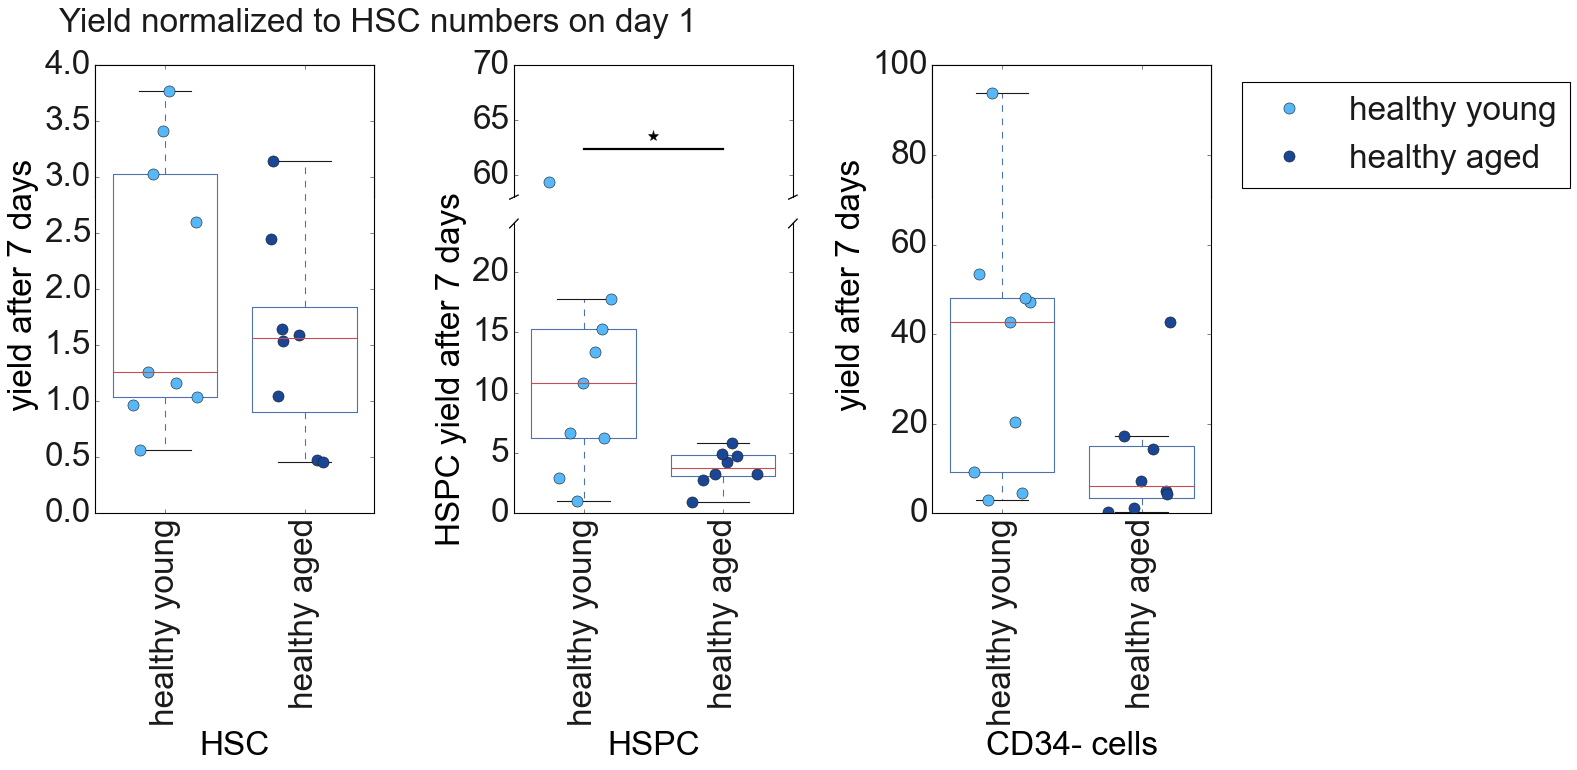

<Figure size 640x480 with 0 Axes>

In [85]:
transf = 'lin'
G = ['healthy young','healthy aged']
add_file_str = '_H_y_vs_a'
opt_test = True
CT_interest = ['HSC','HSPC','mature']
#CT_interest = ['HSC','MPP','MLP','CMP','MEP','GMP','mature']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_y_vs_H_a_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,True,bool_rep_averaged,opt_save)

['380']
[]


C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  

Kolmogorov Smirnov test HSPC: 
p-value group 1 vs. 2: 0.37785090726267195
Kolmogorov Smirnov test mature: 
p-value group 1 vs. 2: 0.6810868869692399
Kolmogorov Smirnov test HSC: 
p-value group 1 vs. 2: 0.8748343160107867


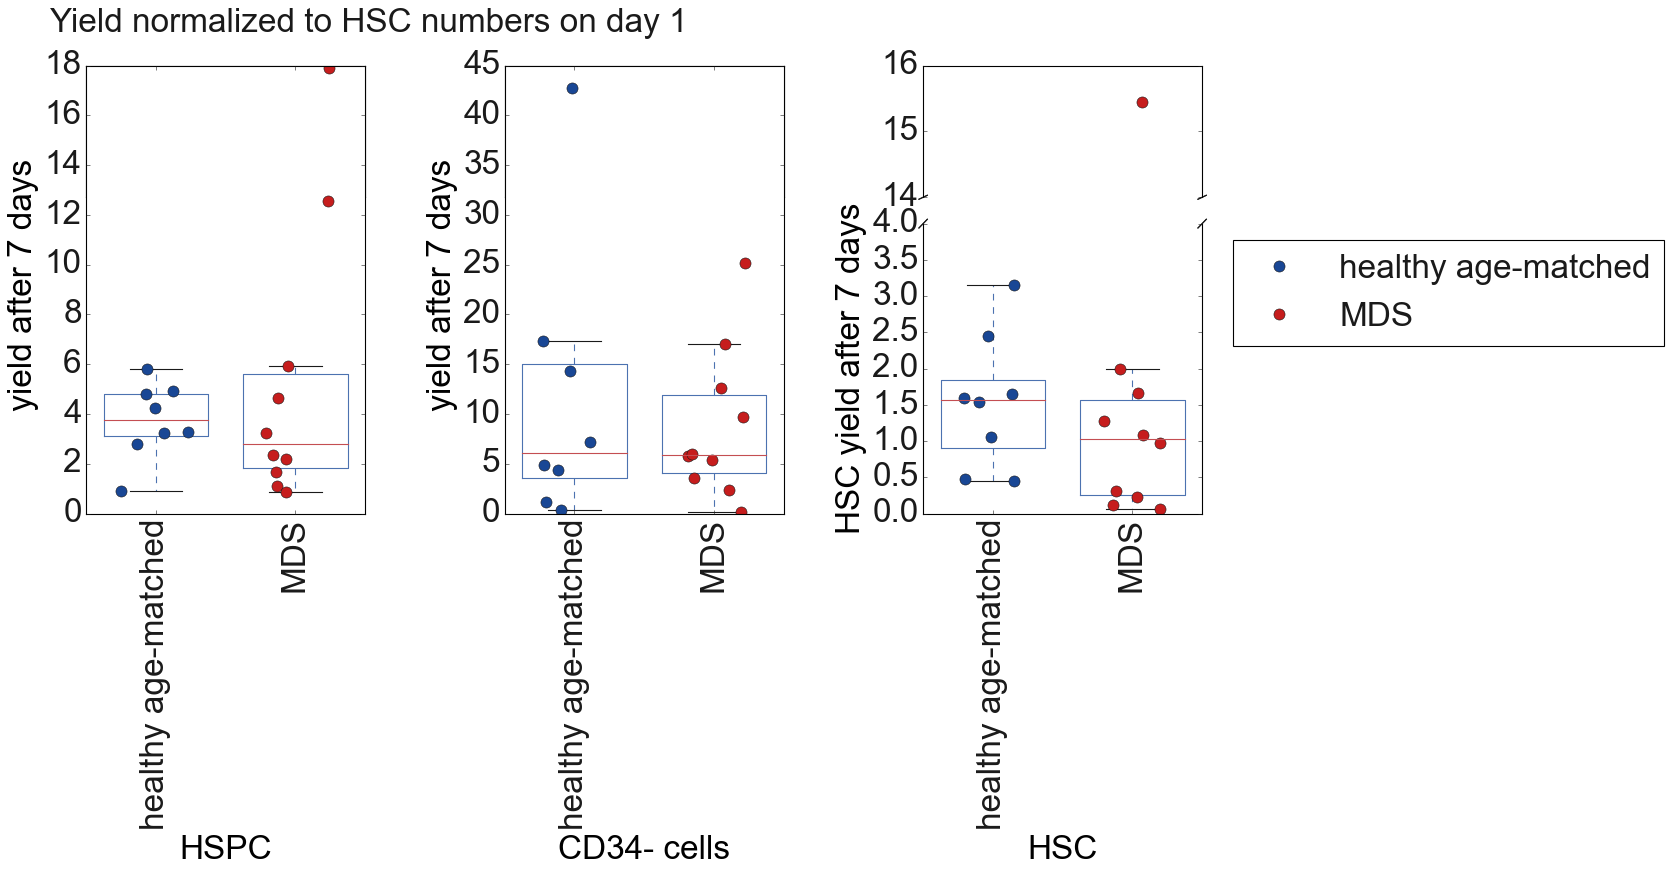

<Figure size 640x480 with 0 Axes>

In [86]:
transf = 'lin'
G = ['healthy age-matched','MDS']
add_file_str = '_H_agematched_vs_MDS'
CT_interest = ['HSPC','mature','HSC']
#CT_interest = ['HSPC','HSC','MPP','MLP','CMP','MEP','GMP','mature']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,True,bool_rep_averaged,opt_save)

GMP
657
0.30233630279483986
[nan nan nan nan nan nan nan nan nan nan nan nan]
----------
[]
CMP
326
1.8737307705338702
['high risk (5)' 'int-II (1.5)']
----------
CMP
360
1.3207265794725322
['int-I (1)' 'intermediate risk (4.5)']
----------
GMP
140
0.3857939717776621
['high (3)' 'very high (7)']
----------
GMP
354
0.6330968123659113
['low (0)' 'low risk (2)']
----------
GMP
360
0.3549452682332423
['int-I (1)' 'intermediate risk (4.5)']
----------
GMP
373
0.2911483539649035
['int-I (0.5)' 'intermediate risk (4)']
----------
GMP
620
0.31663836233140225
['low (0)' 'low risk (2)']
----------
[]
Kolmogorov Smirnov test CMP: 
p-value group 1 vs. 2: 0.015128662187485717
Kolmogorov Smirnov test GMP: 
p-value group 1 vs. 2: 0.14779011837835368


C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


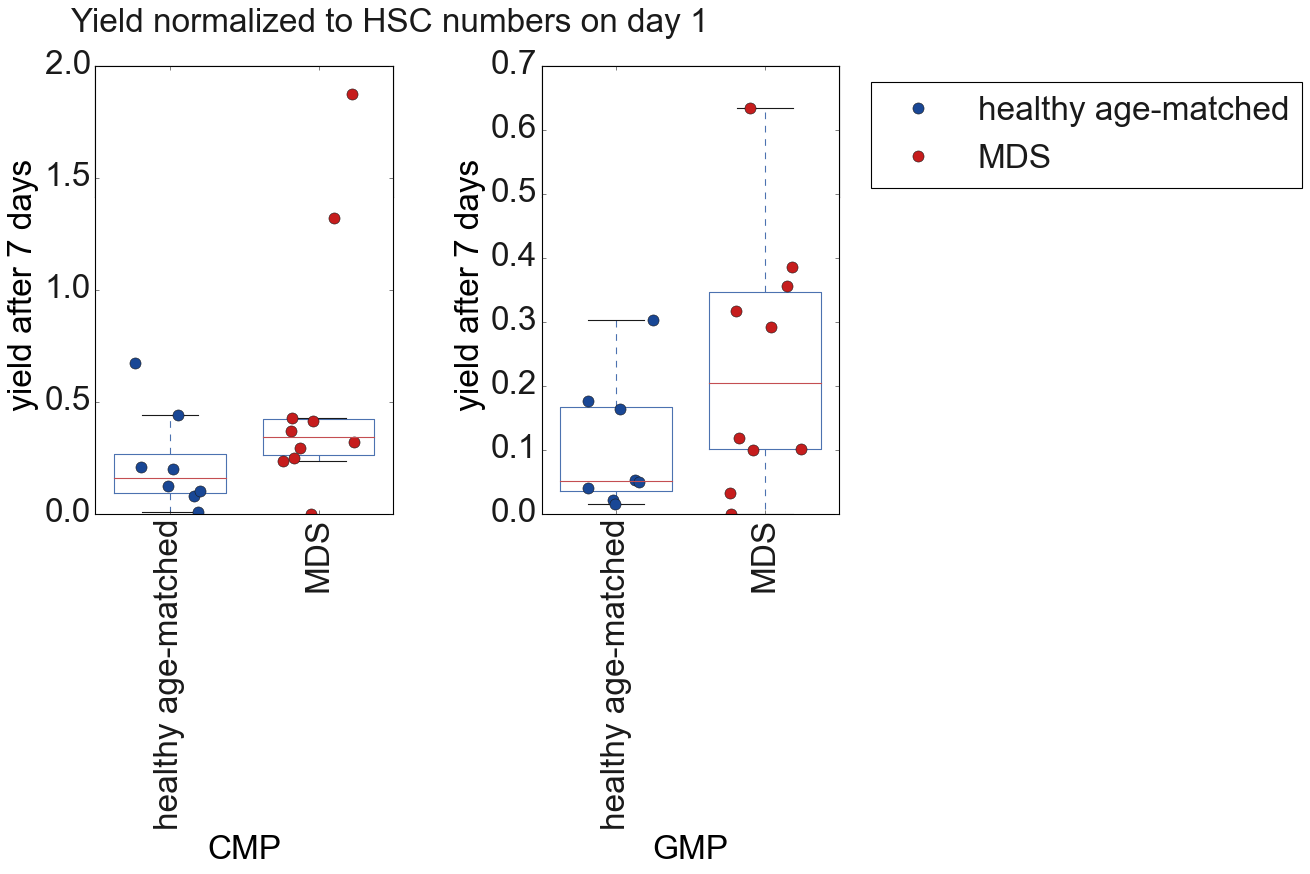

<Figure size 640x480 with 0 Axes>

In [87]:
transf = 'lin'
G = ['healthy age-matched','MDS']
add_file_str = '_H_agematched_vs_MDS'
#CT_interest = ['HSPC','mature','HSC']
CT_interest = ['CMP','GMP']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,False,bool_rep_averaged,opt_save)

['380']
[]


C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  

[]


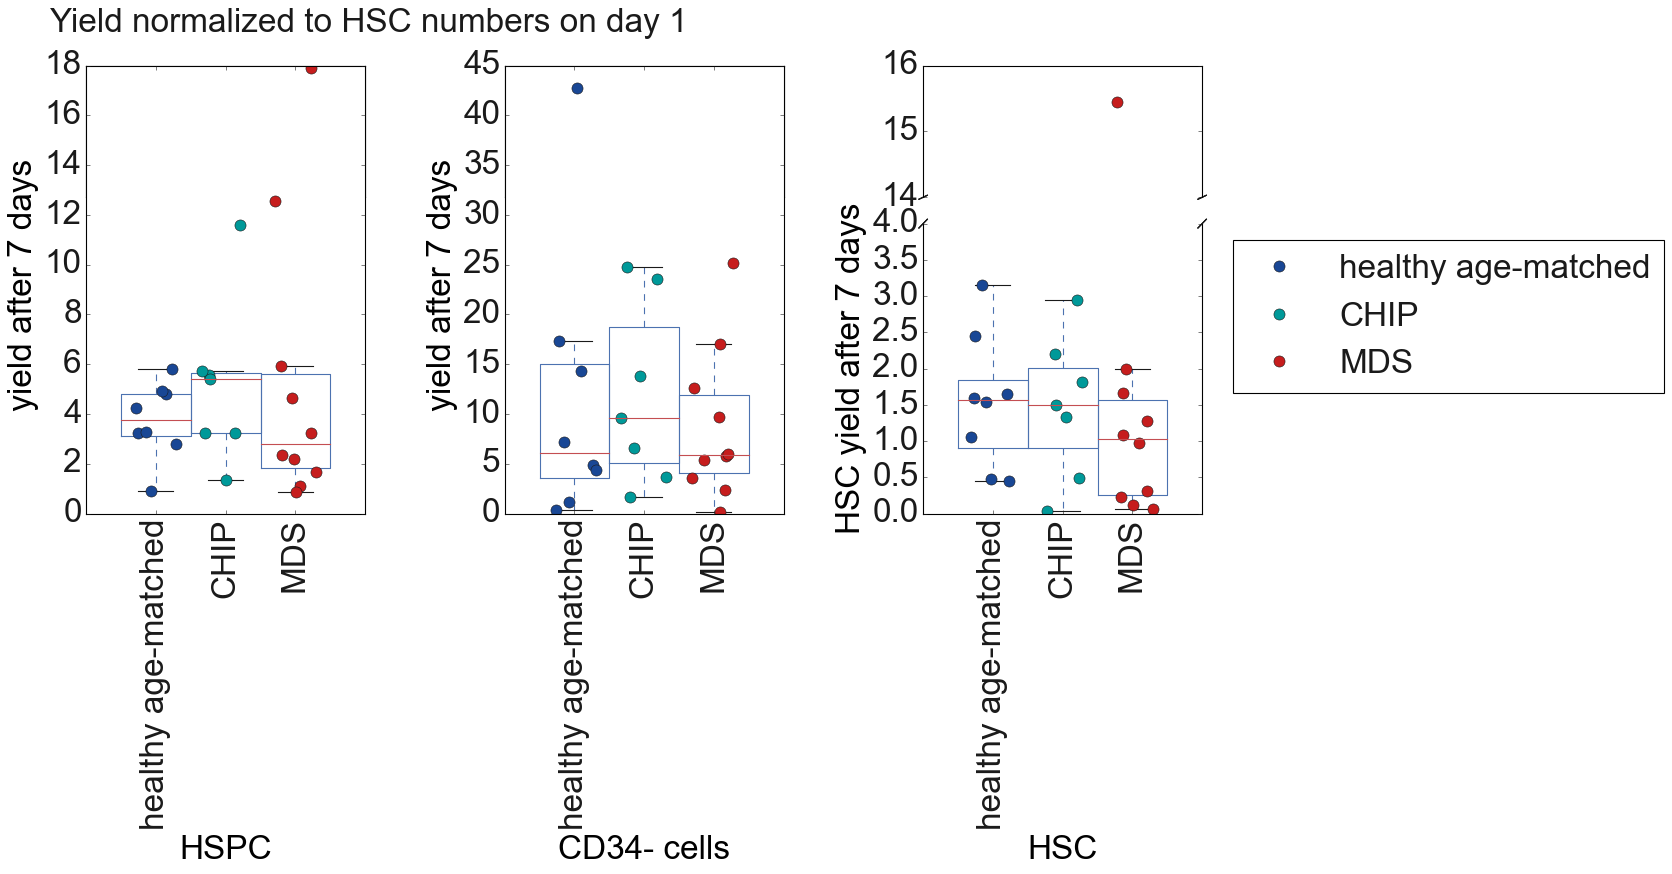

<Figure size 640x480 with 0 Axes>

In [88]:
transf = 'lin'
G = ['healthy age-matched','CHIP','MDS']
add_file_str = '_H_agematched_vs_CHIP_vs_MDS'
CT_interest = ['HSPC','mature','HSC']
#CT_interest = ['HSPC','HSC','MPP','MLP','CMP','MEP','GMP','mature']
bool_rep_averaged = True
plot_yield_after7days(df,G,mutation_str,cols_H_vs_CHIP_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,True,bool_rep_averaged,opt_save)

['500']
[]


C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\PowerWS\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance. 

[]


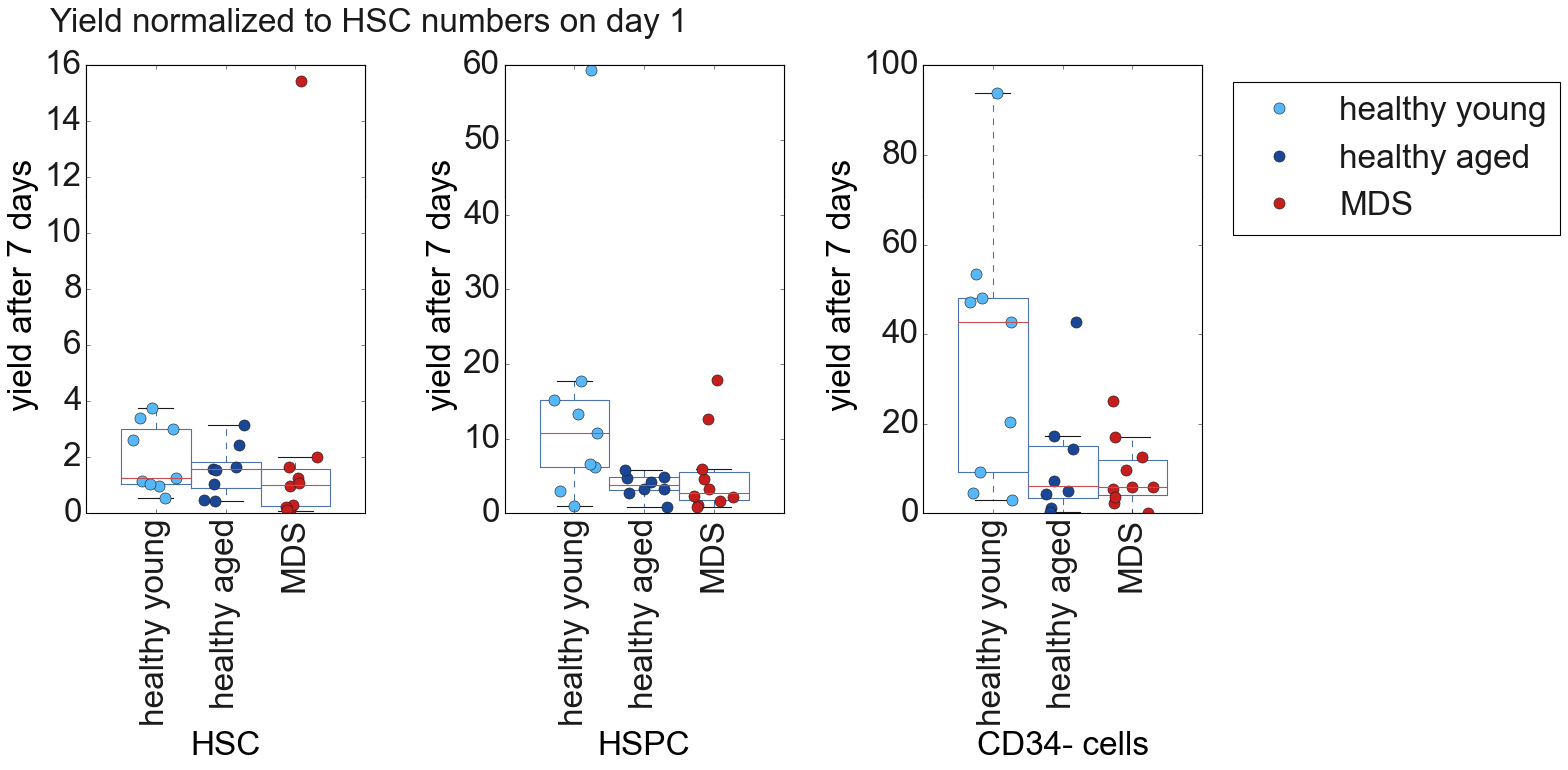

<Figure size 640x480 with 0 Axes>

In [89]:
transf = 'lin'
G = ['healthy young','healthy aged','MDS']
add_file_str = 'H_y_vs_a_vs_MDS'
CT_interest = ['HSC','HSPC','mature']
#CT_interest = ['HSPC','HSC','MPP','MLP','CMP','MEP','GMP','mature']
plot_yield_after7days(df,G,mutation_str,cols_H_y_vs_H_a_vs_MDS,CT_interest,CT_str,transf,opt_test,add_file_str,True,bool_rep_averaged,opt_save)

#### Yield vs age

In [90]:
transf = 'lin'
G = ['healthy young','healthy aged']
add_file_str = '_H_y_vs_a'
CT_interest = ['HSC','HSPC','mature']
#CT_interest = ['HSC','MPP','MLP','CMP','MEP','GMP','mature']
loadPltSettings(18,10)

<module 'matplotlib.pyplot' from 'C:\\Users\\PowerWS\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

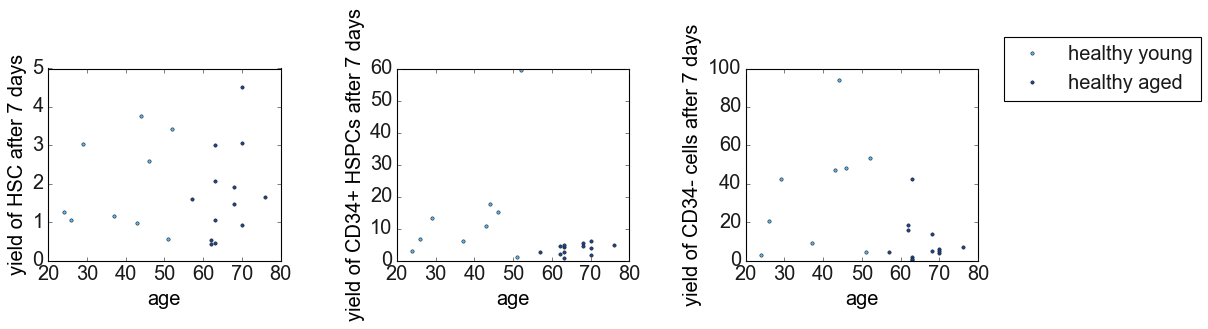

<Figure size 640x480 with 0 Axes>

In [61]:
plot_yield_after7days_vs_age(df,G,mutation_str,cols_H_y_vs_H_a,CT_interest,CT_str,transf,opt_save)

#### Fraction of HSCs vs age

In [53]:
loadPltSettings(15,10) 

<module 'matplotlib.pyplot' from 'C:\\Users\\PowerWS\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

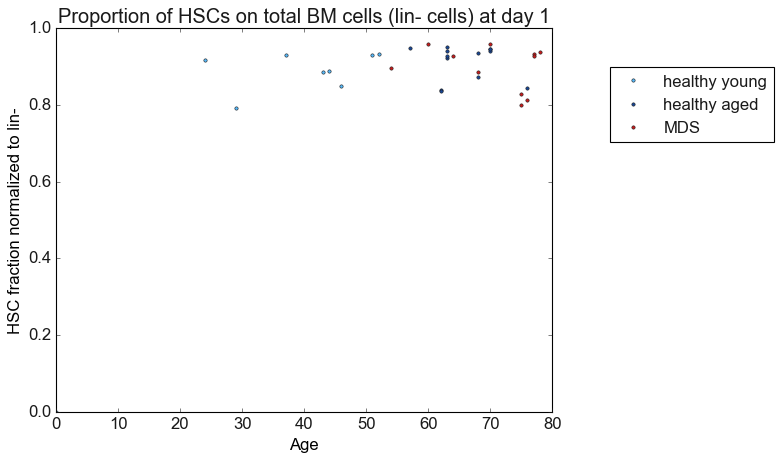

<Figure size 640x480 with 0 Axes>

In [54]:
day=1
G=['healthy young', 'healthy aged', 'MDS']
add_file_str = '_H_y_a_MDS'
plot_fraction_Of_HSCs_at_specific_day_vs_age(df,cols_H_y_vs_H_a_vs_MDS,G,day,add_file_str,opt_save)

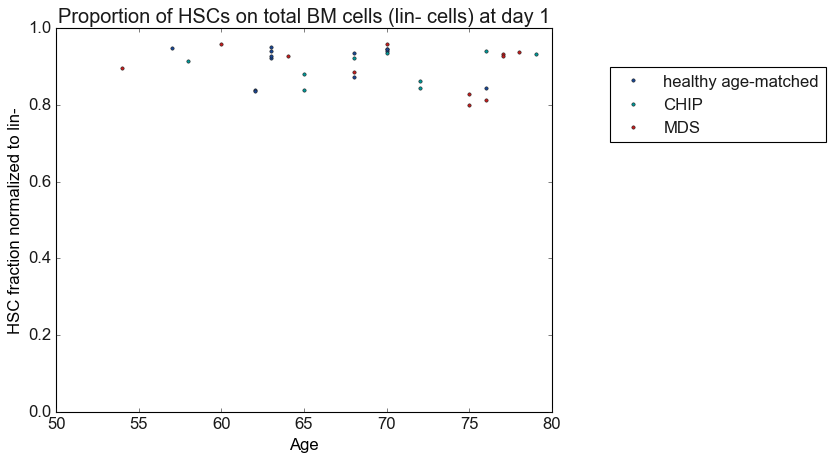

<Figure size 640x480 with 0 Axes>

In [55]:
G=['healthy age-matched','CHIP','MDS']
add_file_str = '_H_CHIP_MDS'
plot_fraction_Of_HSCs_at_specific_day_vs_age(df,cols_H_vs_CHIP_vs_MDS,G,day,add_file_str,opt_save)

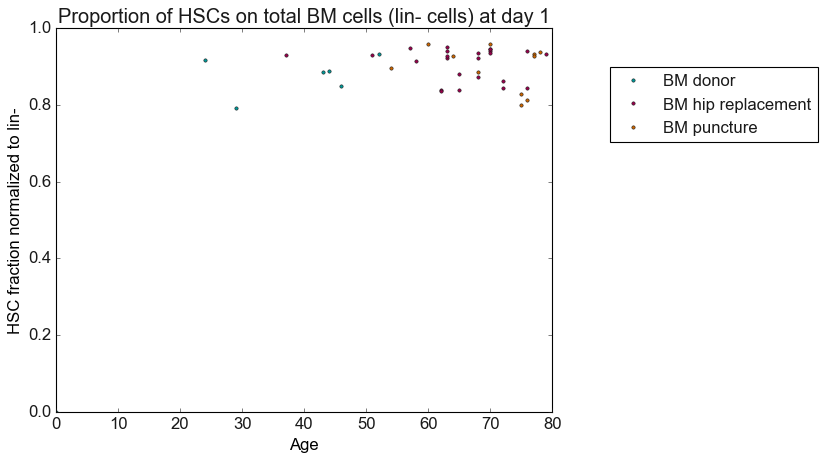

<Figure size 640x480 with 0 Axes>

In [56]:
G=['BM donor', 'BM hip replacement', 'BM puncture']
add_file_str = '_BM_type'
plot_fraction_Of_HSCs_at_specific_day_vs_age(df,cols_BMtype_3,G,day,add_file_str,opt_save)

### Number/ fraction of HSCs per Sample in bar plot (stacked for number of divisions)
(takes a couple of minutes to run)

In [257]:
#loadPltSettings(25,20) #fontSize,markerSize
#for CT in CT_str:
#    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy age-matched','MDS'],cols_divisions,'absoluteNumbers',opt_save)
#    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy age-matched','MDS'],cols_divisions,'percentages',opt_save)
#    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy young','healthy aged'],cols_divisions,'absoluteNumbers',opt_save)
#    plot_number_of_divisions_vs_time_for_CT(CT,df,df_divs_all,['healthy young','healthy aged'],cols_divisions,'percentages',opt_save)

### Percentage of HSCs that have not divided vs. time (a dot for each sample, color coded for Status_detailed)

In [236]:
loadPltSettings(20,10) #fontSize,markerSize

<module 'matplotlib.pyplot' from 'C:\\Users\\PowerWS\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

healthy young
healthy aged


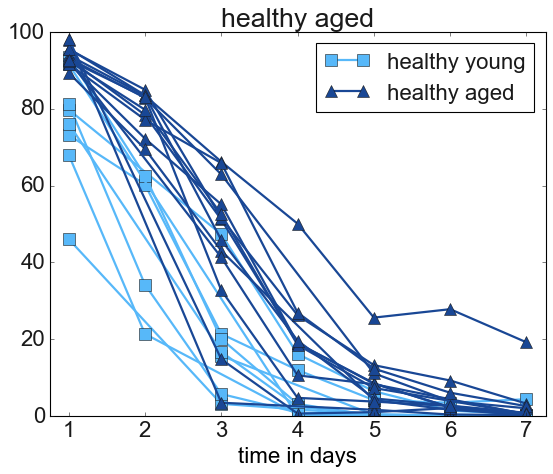

In [237]:
plot_percentage_nondivided_HSCs(df,df_divs_all,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],False,mutation_str,opt_save)

healthy age-matched
MDS


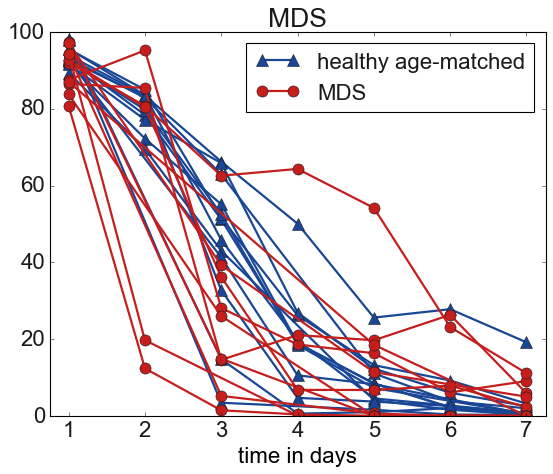

In [238]:
plot_percentage_nondivided_HSCs(df,df_divs_all,['healthy age-matched','MDS'],cols_H_vs_MDS,[marker_H_a,marker_MDS],False,mutation_str,opt_save)

healthy age-matched
CHIP
MDS


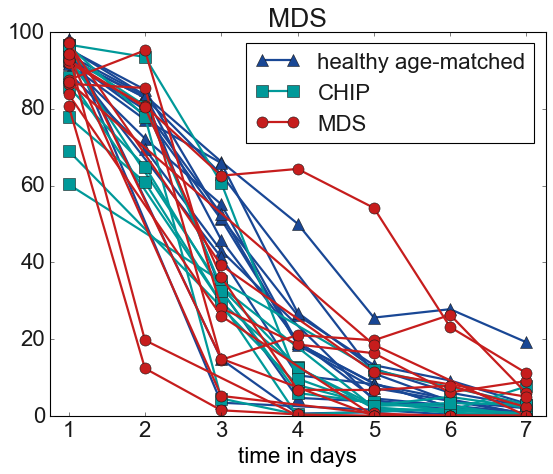

In [241]:
plot_percentage_nondivided_HSCs(df,df_divs_all,['healthy age-matched','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],False,mutation_str,opt_save)

### Percentage of HSCs completed 1st division (comparison to Shepherd et al. 2018)

#### Comparison of young healthy (Age<60, light blue) and aged healthy (Age>=60, dark blue)

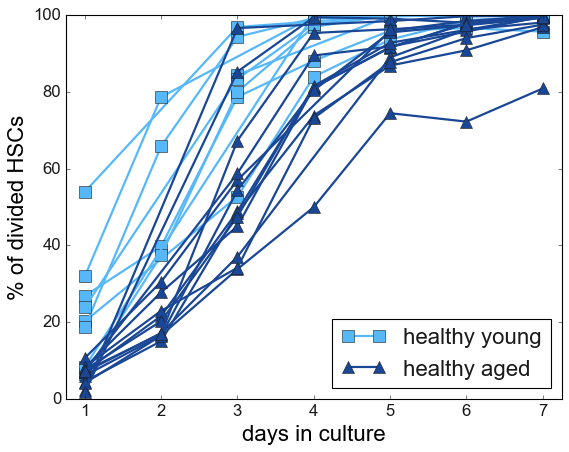

In [245]:
add_file_str='H_young_vs_H_aged'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],1,False,add_file_str,opt_save)

#### Comparison of age matched healthy & MDS 

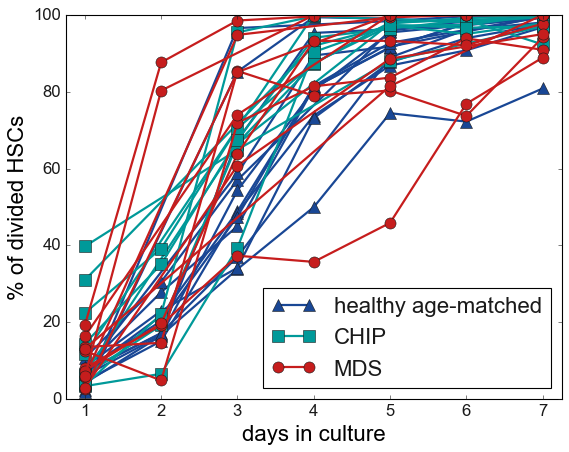

In [246]:
add_file_str='H_agematched_vs_CHIP_vs_MDS'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy age-matched','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],1,False,add_file_str,opt_save)

### Percentage of HSCs completed 2nd division (comparison to Shepherd et al. 2018)

#### Comparison of young healthy (Age<60, light blue), aged healthy (Age>=60, dark blue) and MDS (red) 

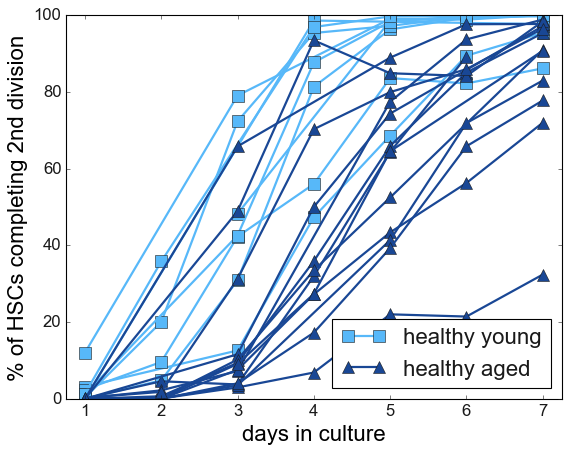

In [247]:
add_file_str='H_young_vs_H_aged'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy young','healthy aged'],cols_H_y_vs_H_a,[marker_H_y,marker_H_a],2,False,add_file_str,opt_save)

#### Comparison of age matched healthy & MDS 

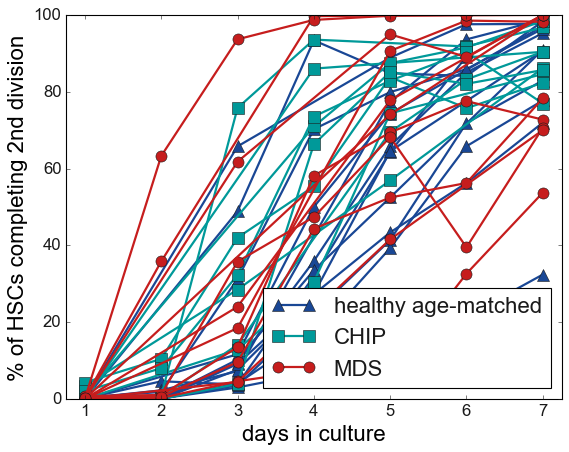

In [248]:
add_file_str='H_agematched_vs_CHIP_vs_MDS'
plot_percentage_of_HSCs_which_completed_nth_division(df,df_divs_all,['healthy age-matched','CHIP','MDS'],cols_H_vs_CHIP_vs_MDS,[marker_H_a,marker_CHIP,marker_MDS],2,False,add_file_str,opt_save)

### Violinplot grouped by Status for each day and cell type:

In [269]:
path = os.getcwd()
os.chdir(path)
%run "defined_functions.ipynb"

In [259]:
loadPltSettings(10,10)

<module 'matplotlib.pyplot' from 'C:\\Users\\PowerWS\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [260]:
np.unique(df_divs_F_all['Group'])

array(['CHIP', 'MDS', 'healthy', 'healthy age-matched', 'healthy aged',
       'healthy young'], dtype=object)

In [266]:
G=['healthy age-matched','MDS']
G[0]

'healthy age-matched'

In [268]:
df_divs_F_1 = df_divs_F_all[df_divs_F_all['Group']==G[0]].copy()
df_divs_F_2 = df_divs_F_all[df_divs_F_all['Group']==G[1]].copy()
df_div_freq = pd.concat([df_divs_F_1,df_divs_F_2])
np.unique(df_div_freq['Group'])

array(['MDS', 'healthy age-matched'], dtype=object)

['MDS' 'healthy age-matched']
['MDS' 'healthy age-matched']
['MDS' 'healthy age-matched']
['MDS' 'healthy age-matched']
['MDS' 'healthy age-matched']
['MDS']


ValueError: There must be exactly two hue levels to use `split`.'

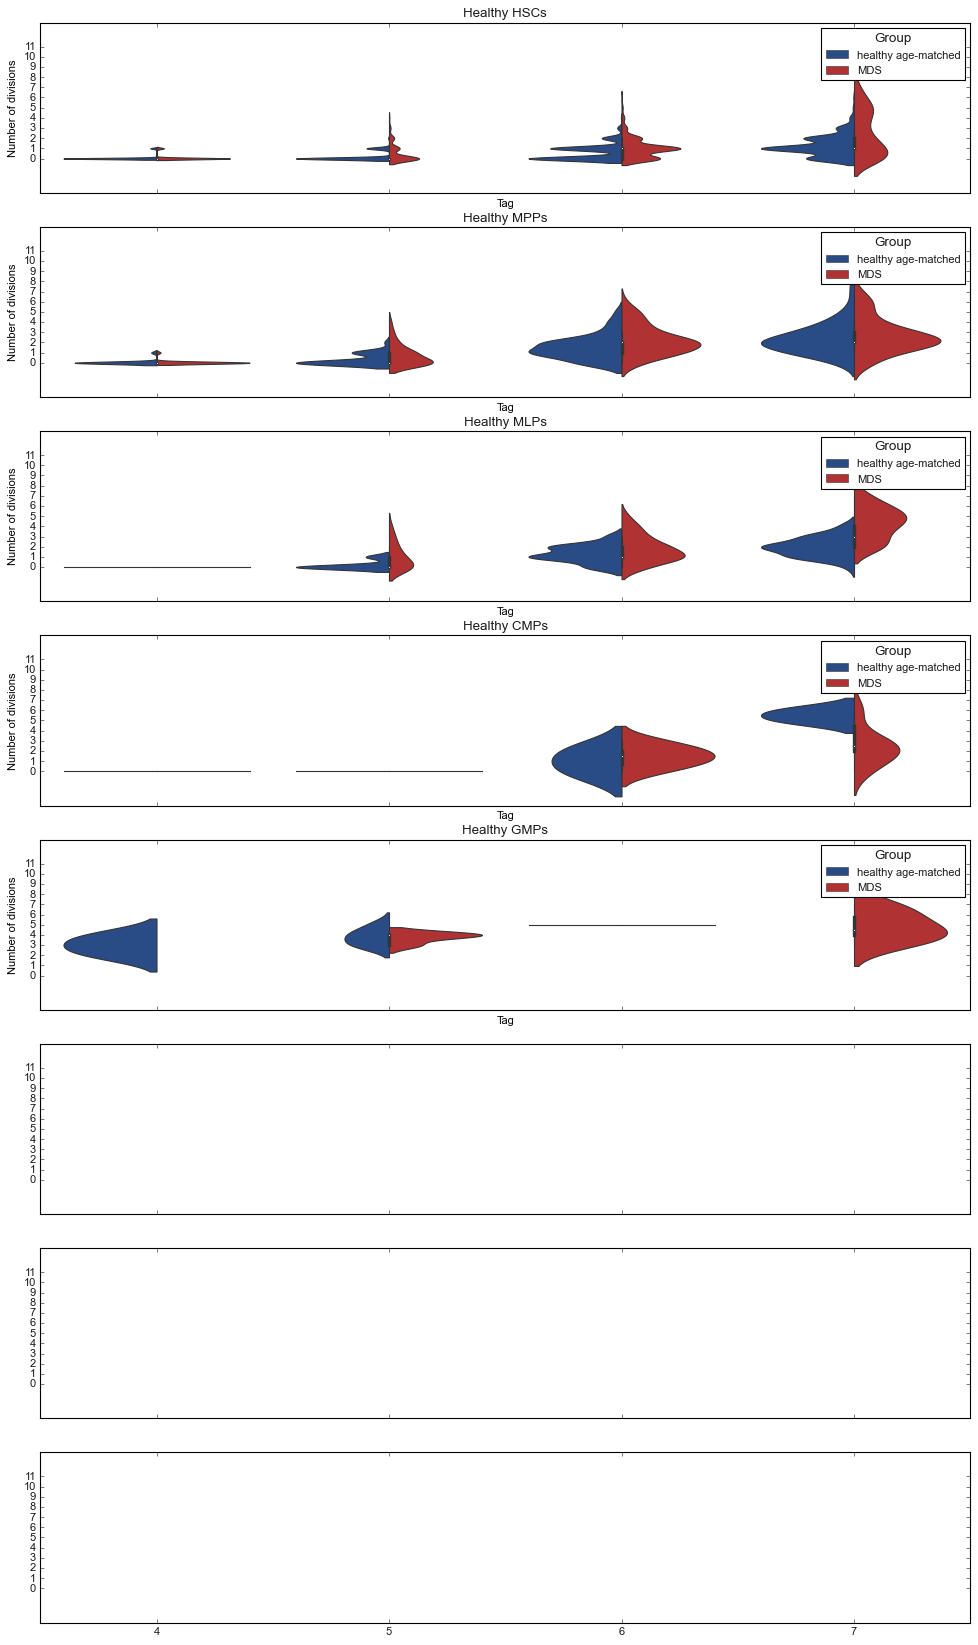

In [270]:
plotDivisionDistributionsAsViolins(df_divs_F_all,CT_str,['healthy age-matched','MDS'],cols_H_vs_MDS,opt_save)

In [ ]:
plotDivisionDistributionsAsViolins(df_divs_F_all,CT_str,['healthy young','MDS'],cols_H_y_vs_MDS,opt_save)

In [ ]:
plotDivisionDistributionsAsViolins(df_divs_F_all,CT_str,['healthy young','healthy aged'],cols_H_y_vs_H_a,opt_save)

### Division distribution as barplots

In [ ]:
plotDivisionDistributionAsBars(df_divs_all,CT_str,['healthy age-matched','MDS'],cols_H_vs_MDS_light,cols_H_vs_MDS,opt_save)

In [ ]:
plotDivisionDistributionAsBars(df_divs_all,CT_str,['healthy young','MDS'],cols_H_y_vs_MDS_light,cols_H_y_vs_MDS,opt_save)

In [ ]:
plotDivisionDistributionAsBars(df_divs_all,CT_str,['healthy young','healthy aged'],cols_H_y_vs_H_a_light,cols_H_y_vs_H_a,opt_save)

--> for every cell type and every day, the observed cell counts were normalized by the total number of cells observed at day 0.